In [1]:
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(6)
tf.config.threading.set_inter_op_parallelism_threads(6)


2024-03-27 16:57:06.681263: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 16:57:07.215880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [3]:
# download_url = [
#     "https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip"
# ]

# for i in download_url:
#     os.system("wget --no-check-certificate -P /mnt/Data/Data/EEG_Converted "+i)

In [4]:


from tensorflow import keras
from keras import layers
import time


up_dataset = []
down_dataset = []
left_dataset = []
right_dataset = []
forward_dataset = []
backward_dataset = []

channels = None
for filename in os.listdir("bigopenbcibrain/down_data"):

    filepath = os.path.join('bigopenbcibrain/down_data', filename)
    data = scipy.io.loadmat(filepath)
    #print(data)
    channels = data['channels']
    
    print(data['data'].shape)
    data_arr = data['data'].T
    down_dataset.append(data_arr)
        
for filename in os.listdir("bigopenbcibrain/up_data"):

    filepath = os.path.join('bigopenbcibrain/up_data', filename)
    data = scipy.io.loadmat(filepath)
    #print(data)
    channels = data['channels']
    print(data['data'].shape)
    data_arr = data['data'].T
    up_dataset.append(data_arr)

for filename in os.listdir("bigopenbcibrain/left_data"):

    filepath = os.path.join('bigopenbcibrain/left_data', filename)
    data = scipy.io.loadmat(filepath)
    #print(data)
    channels = data['channels']
    print(data['data'].shape)
    data_arr = data['data'].T
    left_dataset.append(data_arr)

# for filename in os.listdir("bigopenbcibrain/right_data"):

#     filepath = os.path.join('bigopenbcibrain/right_data', filename)
#     data = scipy.io.loadmat(filepath)
#     #print(data)
#     channels = data['channels']
#     print(data['data'].shape)
#     data_arr = data['data'].T
#     right_dataset.append(data_arr)

# for filename in os.listdir("bigopenbcibrain/forward_data"):

#     filepath = os.path.join('bigopenbcibrain/forward_data', filename)
#     data = scipy.io.loadmat(filepath)
#     #print(data)
#     channels = data['channels']
#     print(data['data'].shape)
#     data_arr = data['data'].T
#     forward_dataset.append(data_arr)

# for filename in os.listdir("bigopenbcibrain/backward_data"):

#     filepath = os.path.join('bigopenbcibrain/backward_data', filename)
#     data = scipy.io.loadmat(filepath)
#     #print(data)
#     channels = data['channels']
#     print(data['data'].shape)
#     data_arr = data['data'].T
#     backward_dataset.append(data_arr)


(979, 7)
(978, 7)
(980, 7)
(991, 7)
(980, 7)
(980, 7)
(980, 7)
(981, 7)
(980, 7)
(981, 7)
(980, 7)
(981, 7)
(975, 7)
(980, 7)
(980, 7)
(981, 7)
(981, 7)
(980, 7)
(980, 7)
(980, 7)
(980, 7)
(982, 7)
(983, 7)
(992, 7)
(982, 7)
(982, 7)
(992, 7)
(982, 7)
(982, 7)
(981, 7)


In [5]:
def minimum_len(dataset):
    return min([dataset[i].shape for i in range(len(dataset))])

In [6]:
for i in range(len(up_dataset)):
    up_dataset[i] = np.resize(up_dataset[i],minimum_len(up_dataset))
for i in range(len(down_dataset)):
    down_dataset[i] = np.resize(down_dataset[i],minimum_len(down_dataset))
for i in range(len(left_dataset)):
    left_dataset[i] = np.resize(left_dataset[i],minimum_len(left_dataset))
# for i in range(len(right_dataset)):
#     right_dataset[i] = np.resize(right_dataset[i],minimum_len(right_dataset))
# for i in range(len(forward_dataset)):
#     forward_dataset[i] = np.resize(forward_dataset[i],minimum_len(forward_dataset))
# for i in range(len(backward_dataset)):
#     backward_dataset[i] = np.resize(backward_dataset[i],minimum_len(backward_dataset))

In [7]:


def read_data(dataset):
    for i in range(len(dataset)):
        dataset[i] = np.resize(dataset[i],minimum_len(dataset))
        d = dataset[i].astype(float)
        dataset[i] = mne.filter.filter_data(d, l_freq=0.1, h_freq=50,sfreq=250)
        print(d.shape)
        
    dataset = np.array(dataset)
    print(dataset.shape)
    return dataset



In [8]:
up_dataset = np.array(up_dataset)
down_dataset = np.array(down_dataset)
left_dataset = np.array(left_dataset)
#right_dataset = np.array(right_dataset)
# backward_dataset = np.array(backward_dataset)
# forward_dataset = np.array(forward_dataset)

In [9]:

#chan_names = ['Fp1','AF7','AF3','AFz','F7','F5','F3','F1','Fz','FT7','FC5','FC3','FC1','T7','C5','C3','C1','Cz','TP7','CP5','CP3','CP1','CPz','P7','P5','P3','P1','Pz','PO7','PO3','POz','Fp2','AF4','AF8','F2','F4','F6','F8','FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8','P2','P4','P6','P8','PO4','PO8','O1','Oz','O2','Iz']
chan_names = ['Cz', 'C3', 'FC2', 'C4', 'CP2', 'FC1', 'CP1']
info = mne.create_info(ch_names=chan_names, ch_types=['eeg']*7, sfreq=250)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: Cz, C3, FC2, C4, CP2, FC1, CP1
 chs: 7 EEG
 custom_ref_applied: False
 dig: 10 items (3 Cardinal, 7 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 250.0 Hz
>


In [10]:
print(up_dataset.shape,down_dataset.shape) #,left_dataset.shape,backward_dataset.shape,forward_dataset.shape,right_dataset.shape)

(10, 7, 975) (10, 7, 978)


In [11]:
%%capture

up_epochs = mne.EpochsArray(data=np.array(up_dataset), info=info)
down_epochs = mne.EpochsArray(data=np.array(down_dataset), info=info)

left_epochs = mne.EpochsArray(data=read_data(left_dataset), info=info)
#right_epochs = mne.EpochsArray(data=read_data(right_dataset), info=info)
# backward_epochs = mne.EpochsArray(data=read_data(backward_dataset), info=info)
# forward_epochs = mne.EpochsArray(data=read_data(forward_dataset), info=info)

In [12]:
import matplotlib
print(matplotlib.__version__)
import mne
print(mne.__version__)


3.7.4
1.5.0


(10, 7, 975)
(10, 7, 978)


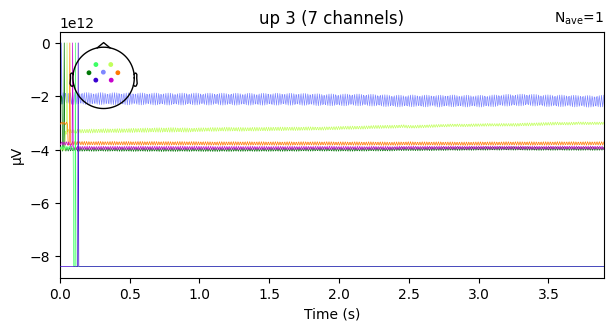

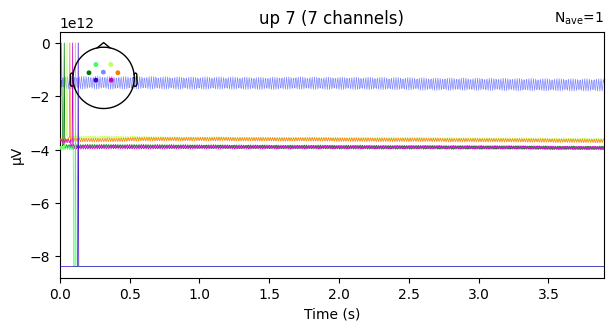

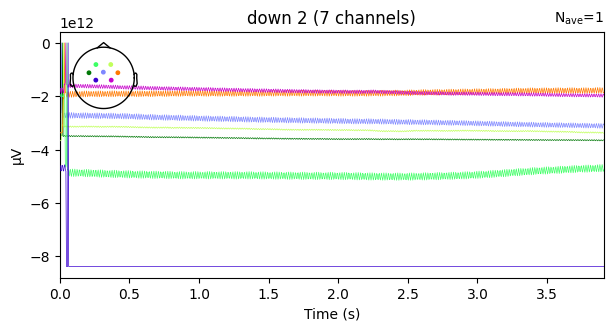

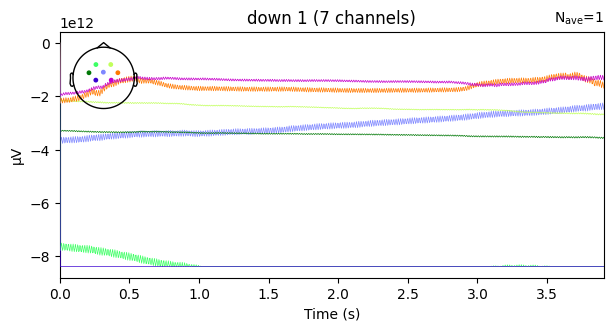

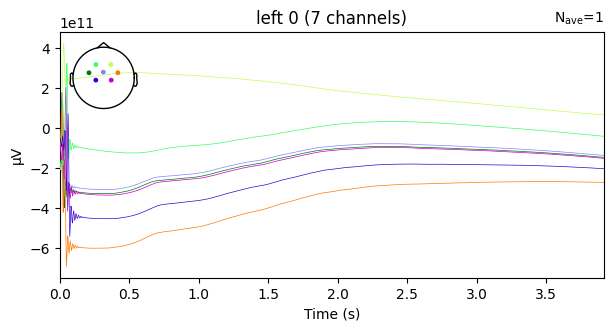

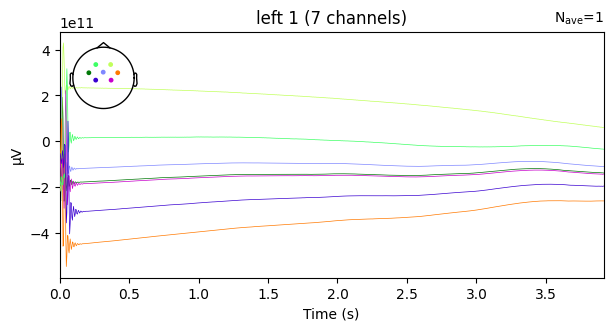

In [13]:
import matplotlib
from mne.time_frequency import tfr_morlet
%matplotlib inline
print(up_epochs.get_data().shape)
print(down_epochs.get_data().shape)




for i in range(2):
    thing = random.randint(0,9)
    d = up_epochs.get_data()[thing]
    
    t_evoked = mne.EvokedArray(d, info, tmin=0)
    t_evoked.plot(titles=f"up {thing}")

    

for i in range(2):
    thing = random.randint(0,9)
    d = down_epochs.get_data()[thing]
    
    t_evoked = mne.EvokedArray(d, info, tmin=0)
    t_evoked.plot(titles=f"down {thing}")

for i in range(2):
    
    d = left_epochs.get_data()[random.randint(0,9)]
    
    t_evoked = mne.EvokedArray(d, info, tmin=0)
    t_evoked.plot(titles=f"left {i}")

# for i in range(2):
    
#     d = right_epochs.get_data()[random.randint(0,9)]
    
#     t_evoked = mne.EvokedArray(d, info, tmin=0)
#     t_evoked.plot(titles=f"rt {i}")


# for i in range(2):
    
#     d = backward_epochs.get_data()[random.randint(0,9)]
    
#     t_evoked = mne.EvokedArray(d, info, tmin=0)
#     t_evoked.plot(titles=f"bacw {i}")

# for i in range(2):
    
#     d = forward_epochs.get_data()[random.randint(0,9)]
    
#     t_evoked = mne.EvokedArray(d, info, tmin=0)
#     t_evoked.plot(titles=f"forw {i}")

    

In [14]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

up_list = []
down_list=[]
left_list = []
right_list = []
forward_list = []
backward_list = []

up_list.append(up_epochs.get_data()[:,:,:970])
down_list.append(down_epochs.get_data()[:,:,:970])
left_list.append(left_epochs.get_data()[:,:,:970])
#right_list.append(right_epochs.get_data()[:,:,:970])
# backward_list.append(backward_epochs.get_data()[:,:,:970])
# forward_list.append(forward_epochs.get_data()[:,:,:970])

up_labels = [0 for i in range(len(up_epochs.get_data()))] 
print(up_labels)

down_labels = [1 for i in range(len(down_epochs.get_data()))]
print(down_labels)

left_labels = [2 for i in range(len(left_epochs.get_data()))]
print(left_labels)

# right_labels = [3 for i in range(len(right_epochs.get_data()))]
# print(right_labels)

# forward_labels = [4 for i in range(len(forward_epochs.get_data()))]
# print(forward_labels)

# backward_labels = [5 for i in range(len(backward_epochs.get_data()))]
# print(backward_labels)



up_array = np.vstack(up_list)
down_array = np.vstack(down_list)
left_array = np.vstack(left_list)
#right_array = np.vstack(right_list)
# forward_array = np.vstack(forward_list)
# backward_array = np.vstack(backward_list)

label_list = up_labels + down_labels + left_labels #+ right_labels + forward_labels + backward_labels
label_array = np.hstack(label_list)
print(label_array)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [15]:
#Functions for features
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)

def stddev(x):
    return np.std(x, axis=-1)

def peaktopeak(x):
    return np.ptp(x, axis=-1)

def variance(x):
    return np.var(x, axis=-1)

def mini(x):
    return np.min(x,axis=-1)

def maxi(x):
    return np.max(x,axis=-1)

def argmini(x):
    return np.argmin(x,axis=-1)

def argmaxi(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)

def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concat_features(x):

    #print(mean_f.shape, mean_power.shape, peaktopeak(x).shape,rms(x).shape,abs_diff_signal(x).shape, skewness(x).shape, kurtosis(x).shape)
    return np.concatenate((peaktopeak(x),rms(x),abs_diff_signal(x), skewness(x), kurtosis(x), variance(x),mean(x),stddev(x)),axis=-1)

def featuresarray_load(data_array):
    features = []
    for d in data_array:
        fs=250
        #mean_power = np.mean(p,axis=0)
        theta = mne.filter.filter_data(d, sfreq=250, l_freq=4, h_freq=8,verbose=False)
        alpha = mne.filter.filter_data(d, sfreq=250, l_freq=8, h_freq=12,verbose=False)
        beta = mne.filter.filter_data(d, sfreq=250, l_freq=12, h_freq=30,verbose=False)
        
        alph_ftrs = concat_features(alpha)
        beta_ftrs = concat_features(beta)
        theta_ftrs = concat_features(theta)
       
        f,p=scipy.signal.welch(beta, fs=250,average='median')
        beta_band = (f >= 13) & (f <= 30)
        psd_c3 = p[1, :]
        psd_c4 = p[5, :]

        res = np.mean([alph_ftrs,beta_ftrs,theta_ftrs],axis=0)
        print('p',psd_c3.shape)
        res = np.concatenate((res,psd_c3,psd_c4))
        
        features.append(res)
    return features

f_up = np.array(featuresarray_load(up_array))
f_dn = np.array(featuresarray_load(down_array))
f_lt = np.array(featuresarray_load(left_array))
#f_rt = np.array(featuresarray_load(right_array))
# f_fw = np.array(featuresarray_load(forward_array))
# f_bw = np.array(featuresarray_load(backward_array))

np.save("up_features_array.npy",allow_pickle=False,arr=f_up)
np.save("down_features_array.npy",allow_pickle=False,arr=f_dn)
np.save("left_features_array.npy",allow_pickle=False,arr=f_lt)
#np.save("right_features_array.npy",allow_pickle=False,arr=f_rt)
# np.save("forward_features_array.npy",allow_pickle=False,arr=f_fw)
# np.save("backward_features_array.npy",allow_pickle=False,arr=f_bw)


p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)
p (129,)


In [16]:
import pywt
import scipy.signal
from scipy import stats
def mean(x):
    return np.mean(x, axis=-1).reshape(-1, 1)

def stddev(x):
    return np.std(x, axis=-1).reshape(-1, 1)

def peaktopeak(x):
    return np.ptp(x, axis=-1).reshape(-1, 1)

def variance(x):
    return np.var(x, axis=-1).reshape(-1, 1)

def mini(x):
    return np.min(x, axis=-1).reshape(-1, 1)

def maxi(x):
    return np.max(x, axis=-1).reshape(-1, 1)

def argmini(x):
    return np.argmin(x, axis=-1).reshape(-1, 1)

def argmaxi(x):
    return np.argmax(x, axis=-1).reshape(-1, 1)

def rms(x):
    return np.sqrt(np.mean(x**2, axis=-1)).reshape(-1, 1)

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis=-1)), axis=-1).reshape(-1, 1)

def skewness(x):
    return stats.skew(x, axis=-1).reshape(-1, 1)

def kurtosis(x):
    return stats.kurtosis(x, axis=-1).reshape(-1, 1)

def concat_features(x):
    features = np.concatenate(
        (
            peaktopeak(x),
            rms(x),
            abs_diff_signal(x),
            skewness(x),
            kurtosis(x),
            variance(x),
            mean(x),
            stddev(x)
        ),
        axis=1
    )
    return features

def apply_cwt(data, scales, wavelet_name='morl'):
    """
    Apply Continuous Wavelet Transform (CWT) to EEG data.

    :param data: EEG data in CSP space with shape (components, timepoints)
    :param scales: Scales for CWT
    :param wavelet_name: Name of the mother wavelet for CWT
    :return: CWT coefficients
    """
    cwt_coeffs = np.array([pywt.cwt(data[i, :], scales, wavelet_name)[0] for i in range(data.shape[0])])
    return cwt_coeffs

    
def featuresarray_load2(data_array):
    features = []
    fs = 500
    for d in data_array:
        
       
        alpha = mne.filter.filter_data(d, sfreq=fs, l_freq=8, h_freq=12,verbose=False)
        beta = mne.filter.filter_data(d, sfreq=fs, l_freq=12, h_freq=30,verbose=False)
        
        alph_ftrs = concat_features(alpha)
        beta_ftrs = concat_features(beta)
        
        #nperseg = 256
        
        
        _,p=scipy.signal.welch(beta, fs=fs,average='median',nfft = data_array.shape[2]//2)
        _,p2=scipy.signal.welch(alpha, fs=fs,average='median',nfft = data_array.shape[2]//2)
        

        res = np.mean([alph_ftrs,beta_ftrs],axis=0)
        #print('p',p.shape,res.shape)
        res = np.concatenate((res,p,p2),axis=1)
        #print(res.shape)
        features.append(res)
    return np.array(features)

In [17]:
# import numpy as np
# from sklearn.base import TransformerMixin
# from sklearn.preprocessing import StandardScaler


# class NDStandardScaler(TransformerMixin):
#     def __init__(self, **kwargs):
#         self._scaler = StandardScaler(copy=True, **kwargs)
#         self._orig_shape = None

#     def fit(self, X, **kwargs):
#         X = np.array(X)
#         # Save the original shape to reshape the flattened X later
#         # back to its original shape
#         if len(X.shape) > 1:
#             self._orig_shape = X.shape[1:]
#         X = self._flatten(X)
#         self._scaler.fit(X, **kwargs)
#         return self

#     def transform(self, X, **kwargs):
#         X = np.array(X)
#         X = self._flatten(X)
#         X = self._scaler.transform(X, **kwargs)
#         X = self._reshape(X)
#         return X

#     def _flatten(self, X):
#         # Reshape X to <= 2 dimensions
#         if len(X.shape) > 2:
#             n_dims = np.prod(self._orig_shape)
#             X = X.reshape(-1, n_dims)
#         return X

#     def _reshape(self, X):
#         # Reshape X back to it's original shape
#         if len(X.shape) >= 2:
#             X = X.reshape(-1, *self._orig_shape)
#         return X

In [18]:
# from keras.models import Sequential
# from keras.layers import Dense
# from matplotlib import pyplot as plt
# from sklearn.decomposition import PCA
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from mne.decoding import CSP
# import mne
# from mne.decoding import CSP
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.pipeline import Pipeline
# from keras.layers import Dense, Conv1D, MaxPooling1D, AveragePooling1D, LSTM, Dropout, BatchNormalization, PReLU, Reshape, GlobalMaxPooling1D, SpatialDropout1D
# from keras.regularizers import l1_l2

# all_epochs_data = np.vstack([up_array, down_array,left_array]) #, left_array, right_array, forward_array, backward_array
# all_labels = np.hstack([up_labels, down_labels,left_labels]) #, left_labels, right_labels, forward_labels, backward_labels


# n_classes = 3 
# ncomp = 7  


# csp_transformed_data = {}
# for class_index in range(n_classes):
#     y = (all_labels == class_index).astype(int)
#     csp = CSP(n_components=ncomp, norm_trace=False, transform_into='csp_space')
#     csp.fit(all_epochs_data, y)
#     csp_transformed_data[class_index] = csp.transform(all_epochs_data)

# print('CSP FILTERS DICT:',csp_transformed_data)

# n_trials = len(label_array)  
# n_components = ncomp      
# n_time_points = csp_transformed_data[0].shape[2]   


# combined_features = np.zeros((n_trials, n_components, n_time_points))

# lstt = [i for i in range(n_classes)]
# for i, label in enumerate(lstt):

#     csp_features_for_label = csp_transformed_data.get(label, None)

    
#     if csp_features_for_label is not None and i < len(csp_features_for_label):
#         combined_features[i, :, :] = csp_features_for_label[i]

# print(combined_features.shape)
# y = np.zeros((all_epochs_data.shape[0], n_classes))  

# for i, event_id in enumerate(lstt):
#     binary_labels = (label_array == event_id).astype(int)
#     y[:, i] = binary_labels  


# y_flattened = np.argmax(y, axis=1)


# ftrs = featuresarray_load2(combined_features)

# print('features shape: ',ftrs.shape,y_flattened.shape)
# X_train, X_test, y_train, y_test = train_test_split(ftrs, y_flattened, train_size=0.6, random_state=42, stratify=label_array)

# print("SHAPES:",X_train.shape,X_test.shape)
# scaler = NDStandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# from keras.layers import PReLU, Conv1D, Dropout, SpatialDropout1D, MaxPooling1D, GlobalMaxPooling1D, Layer, AveragePooling1D, LSTM, Reshape, BatchNormalization
# from keras.regularizers import l1_l2

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
# GLOBAL_SHAPE_LENGTH = ftrs.shape[2]
# model = Sequential([
#         Reshape((GLOBAL_SHAPE_LENGTH,ncomp)),
#         BatchNormalization(),

#         Conv1D(64, kernel_size=7),
#         PReLU(),
#         BatchNormalization(),

#         MaxPooling1D(pool_size=2),
#         SpatialDropout1D(0.1),

#         Conv1D(128, kernel_size=5),
#         BatchNormalization(),
#         PReLU(),
#         AveragePooling1D(pool_size=2),
#         SpatialDropout1D(0.1),

#         LSTM(128, activation='tanh', recurrent_regularizer=l1_l2(l1=0.01, l2=0.01),return_sequences=True),
#         BatchNormalization(),
#         GlobalMaxPooling1D(),
#         BatchNormalization(),
#         Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
#         BatchNormalization(),
#         Dropout(0.1),
#         Dense(units=64, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.1),
#         Dense(units=n_classes, activation='softmax')
#     ])


# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=300, validation_split=0.1)


In [19]:
# print(model.evaluate(X_test,y_test)[1]*100.00)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt

(30, 314)
314
(24, 314)
(6, 314)
(24,)
(6,)
8 8 8 0 0 0 314
2 2 2 0 0 0 314


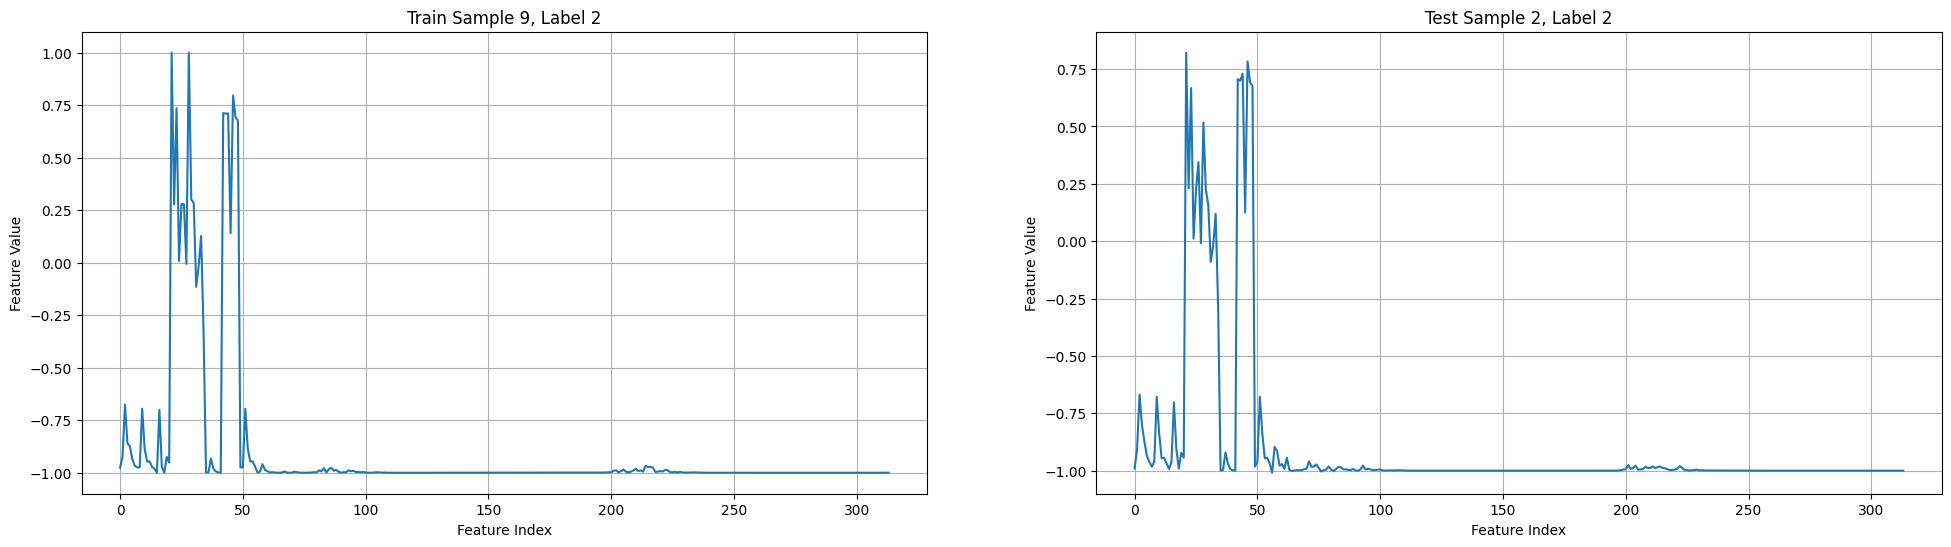

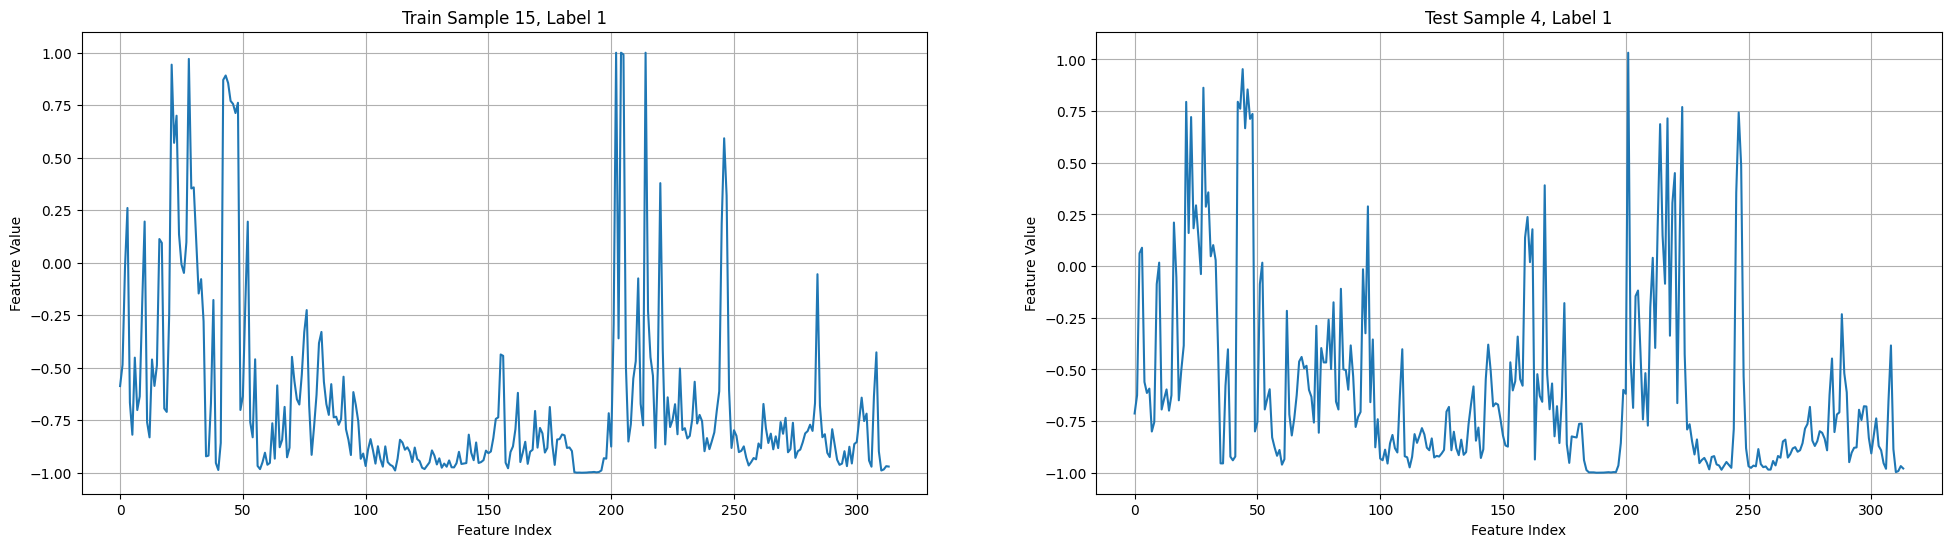

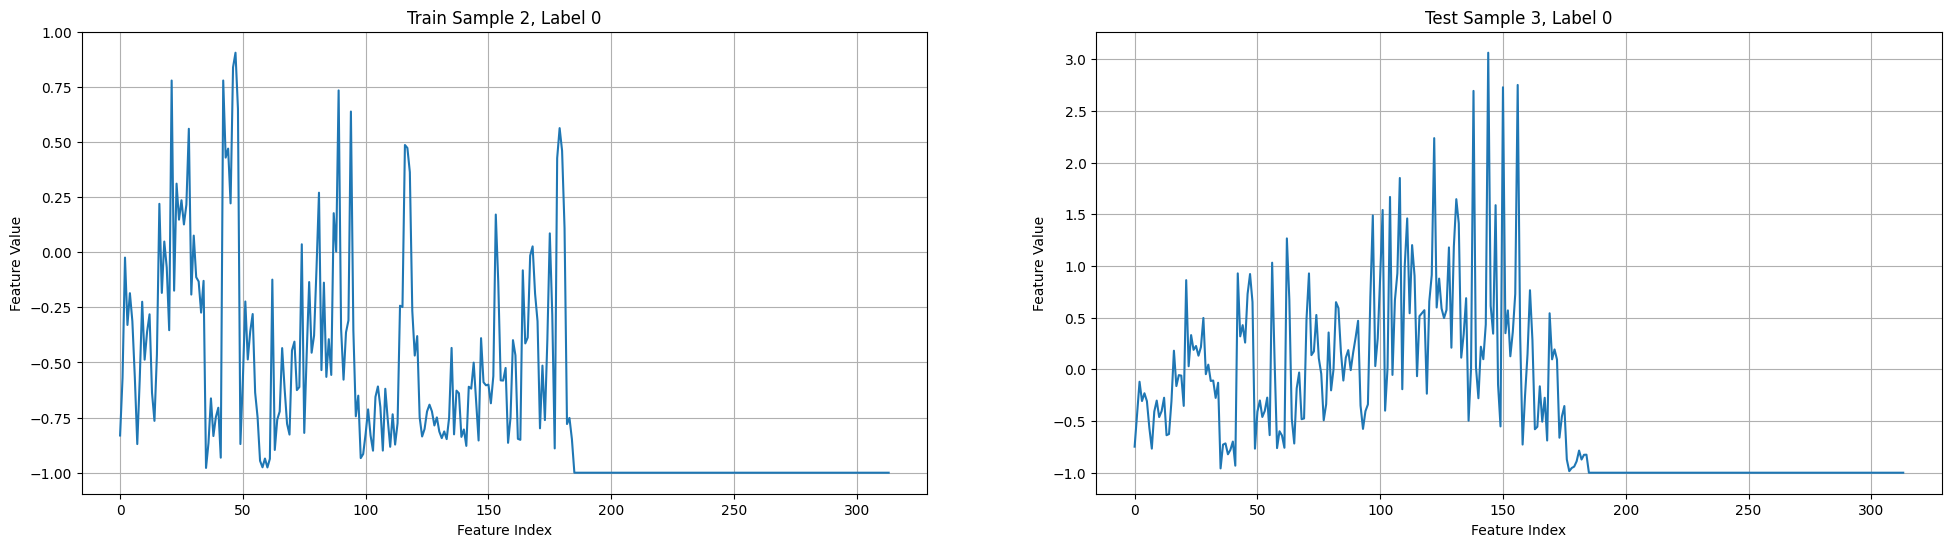

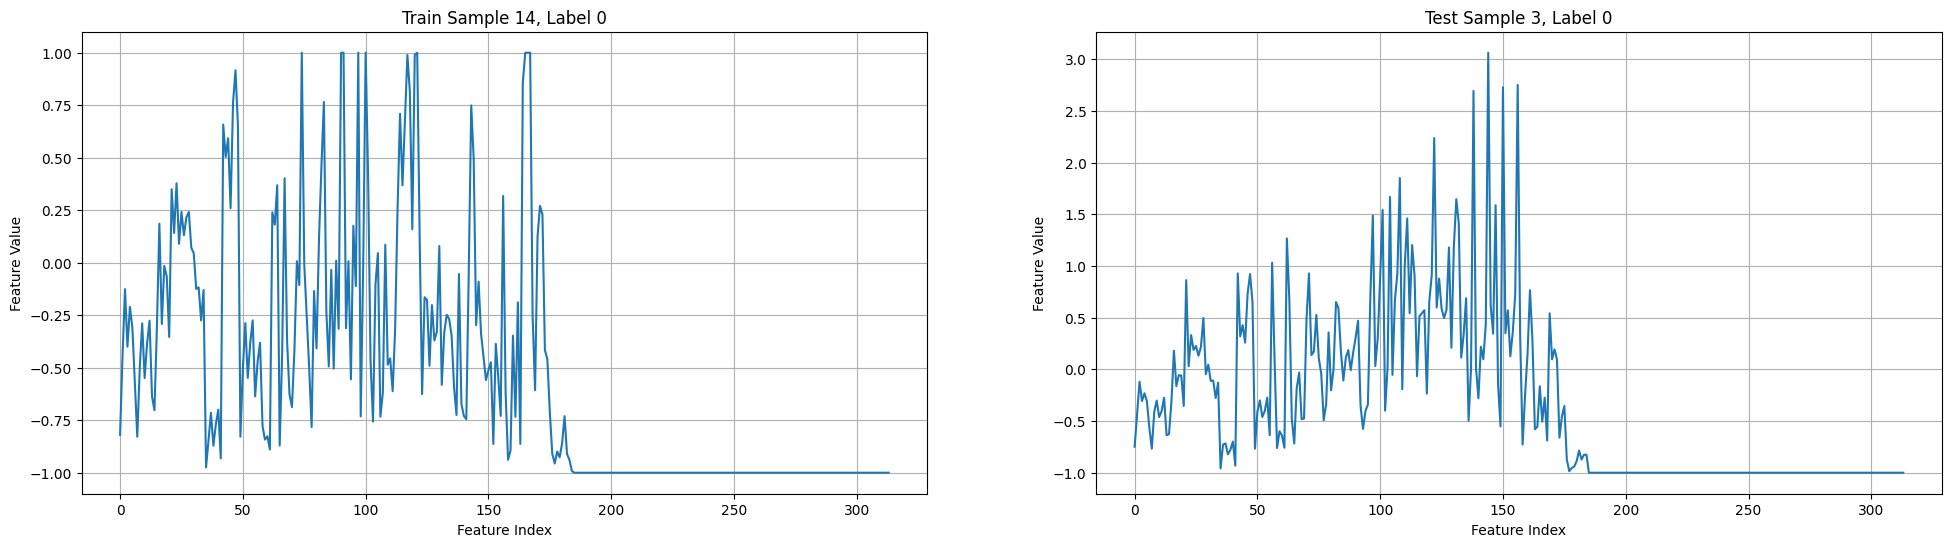

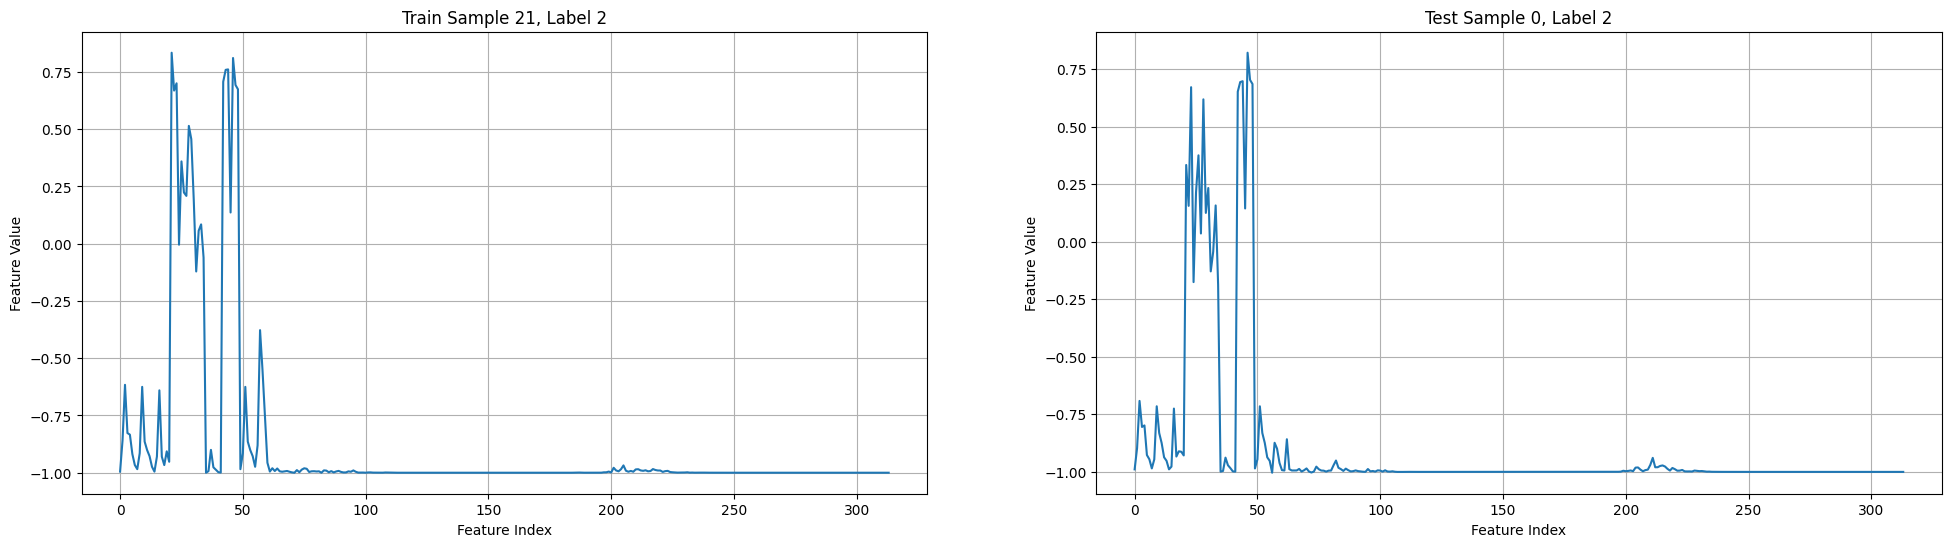

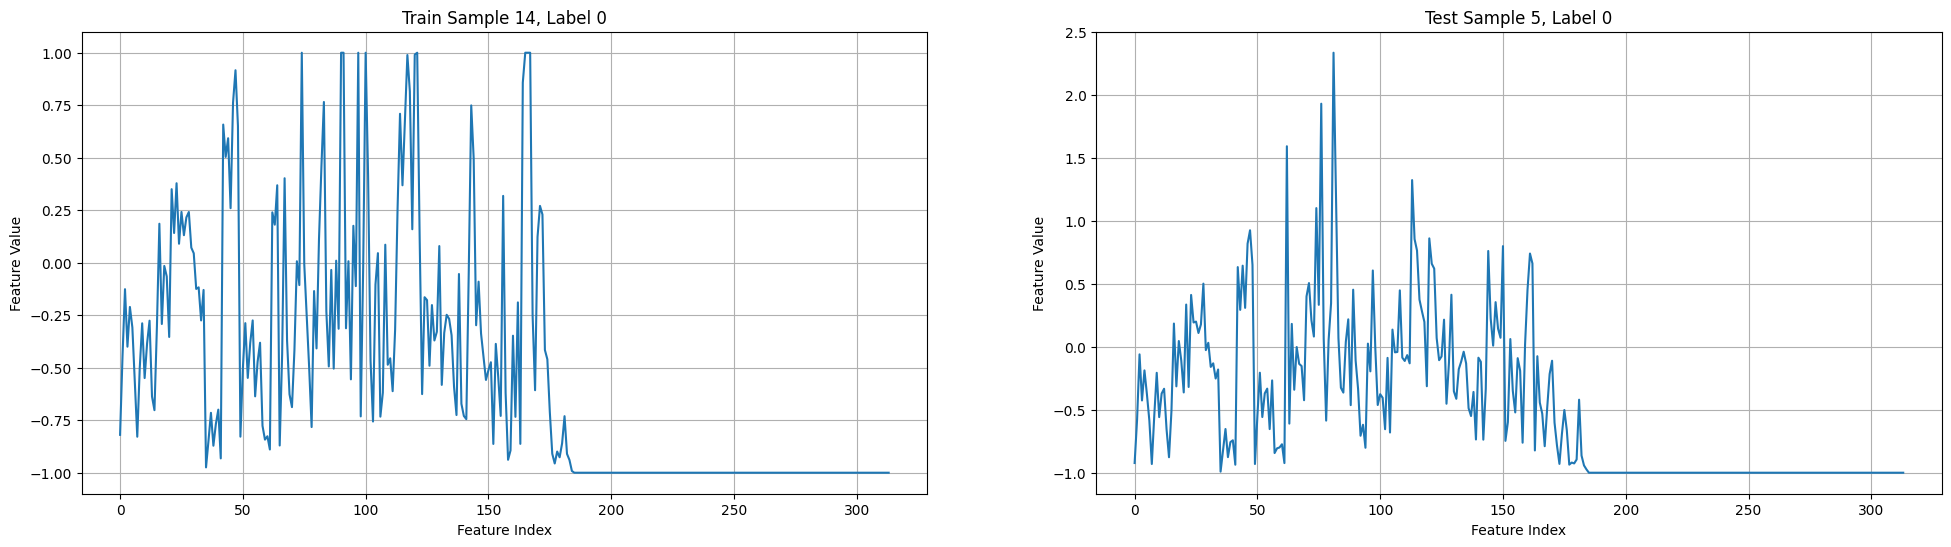

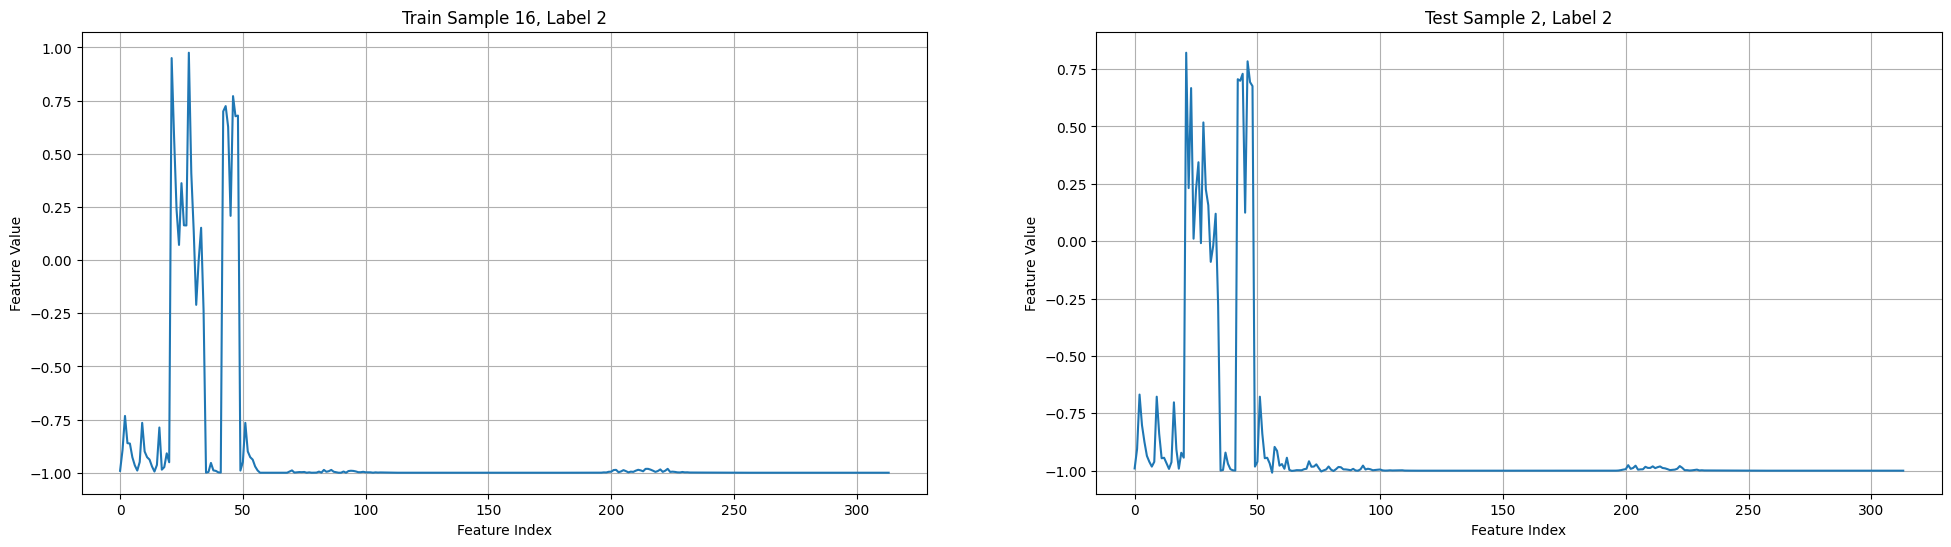

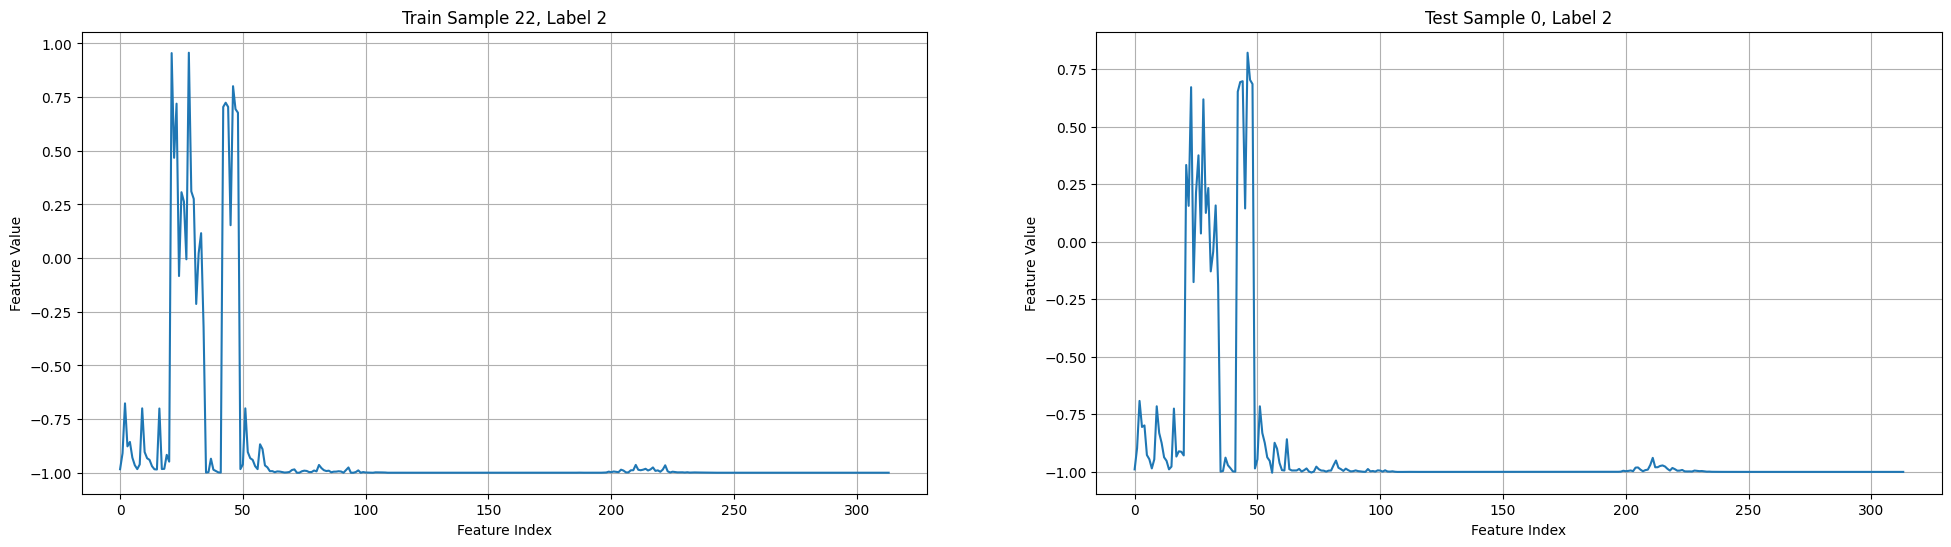

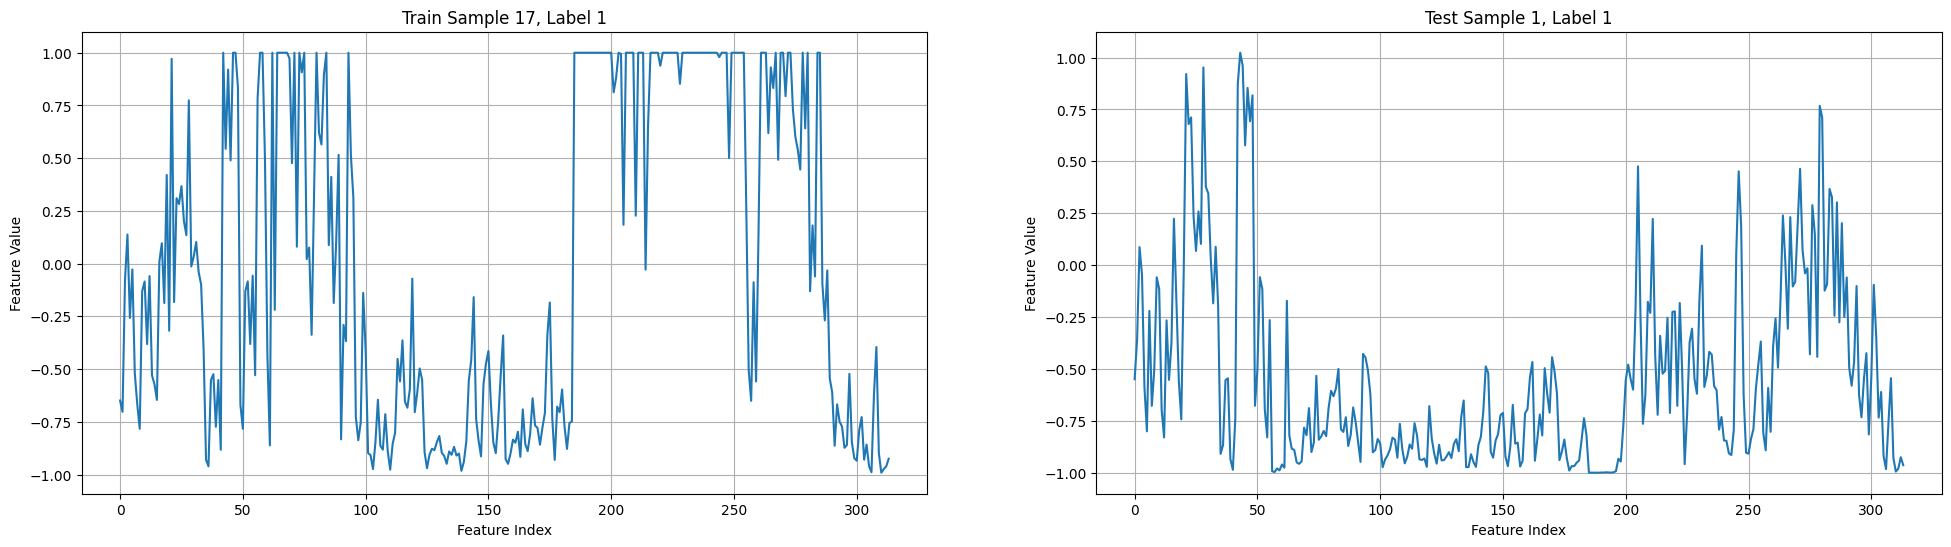

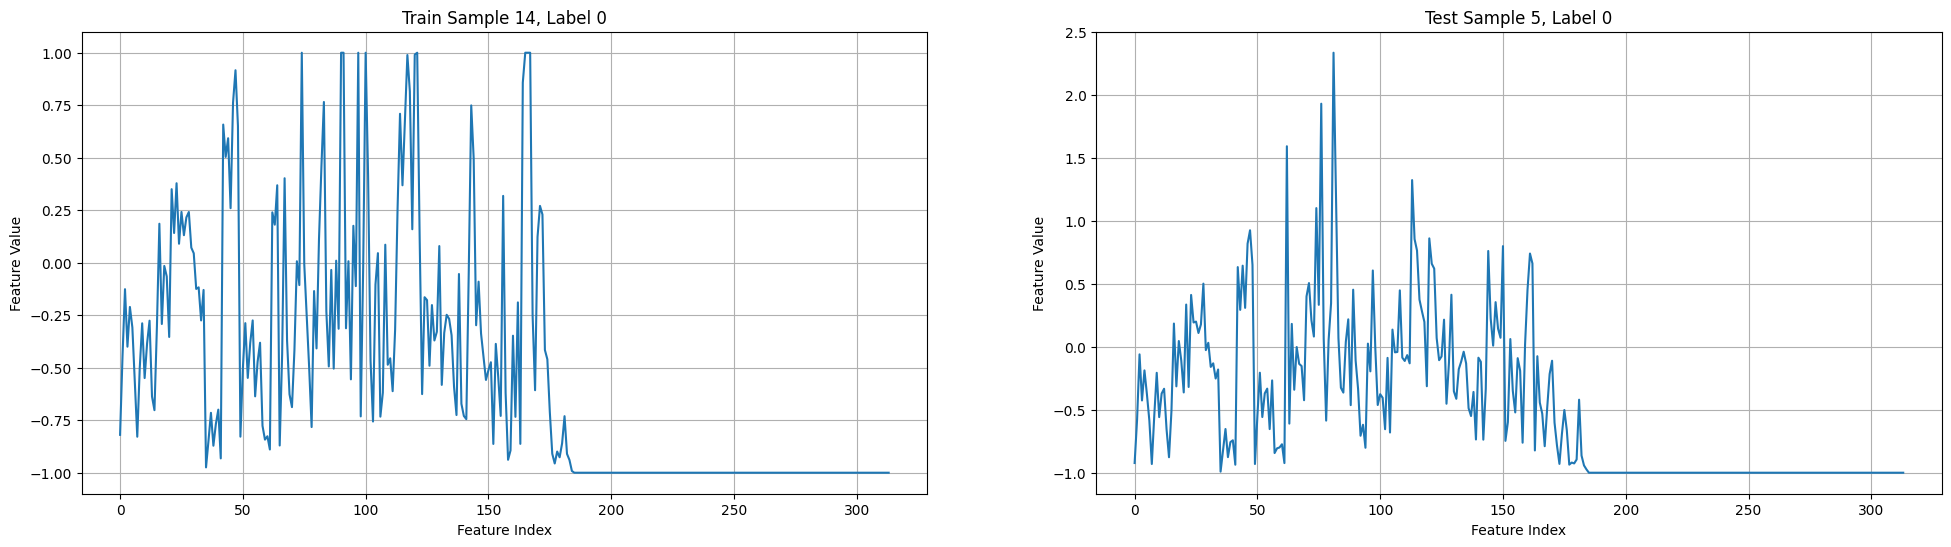

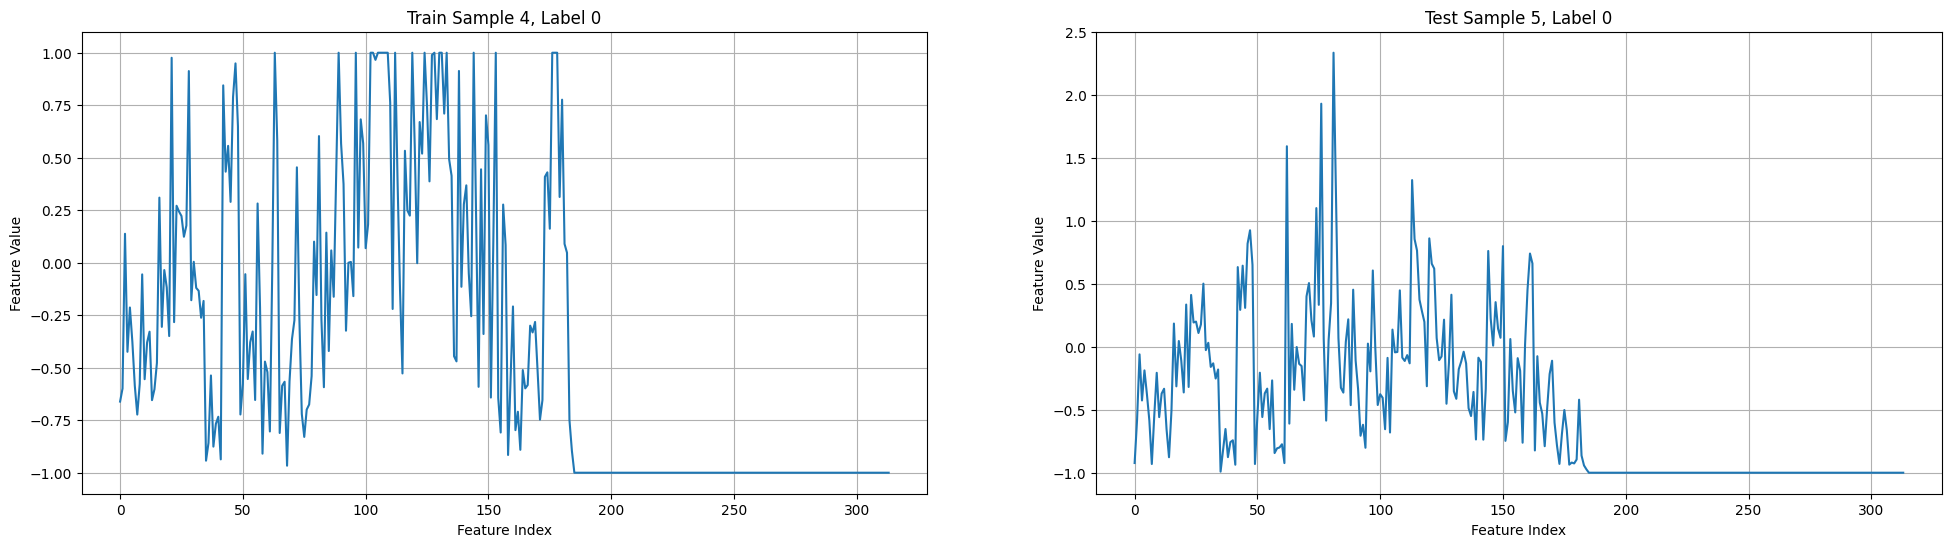

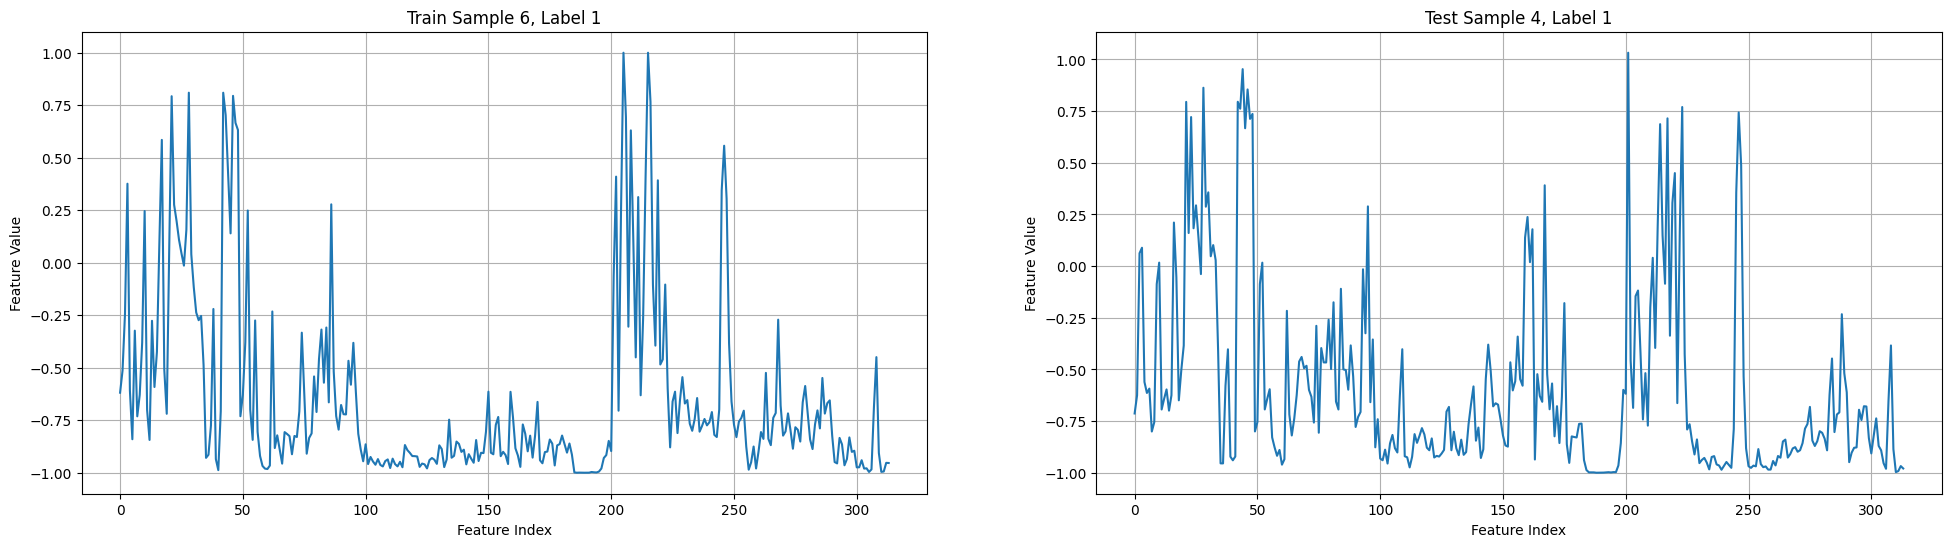

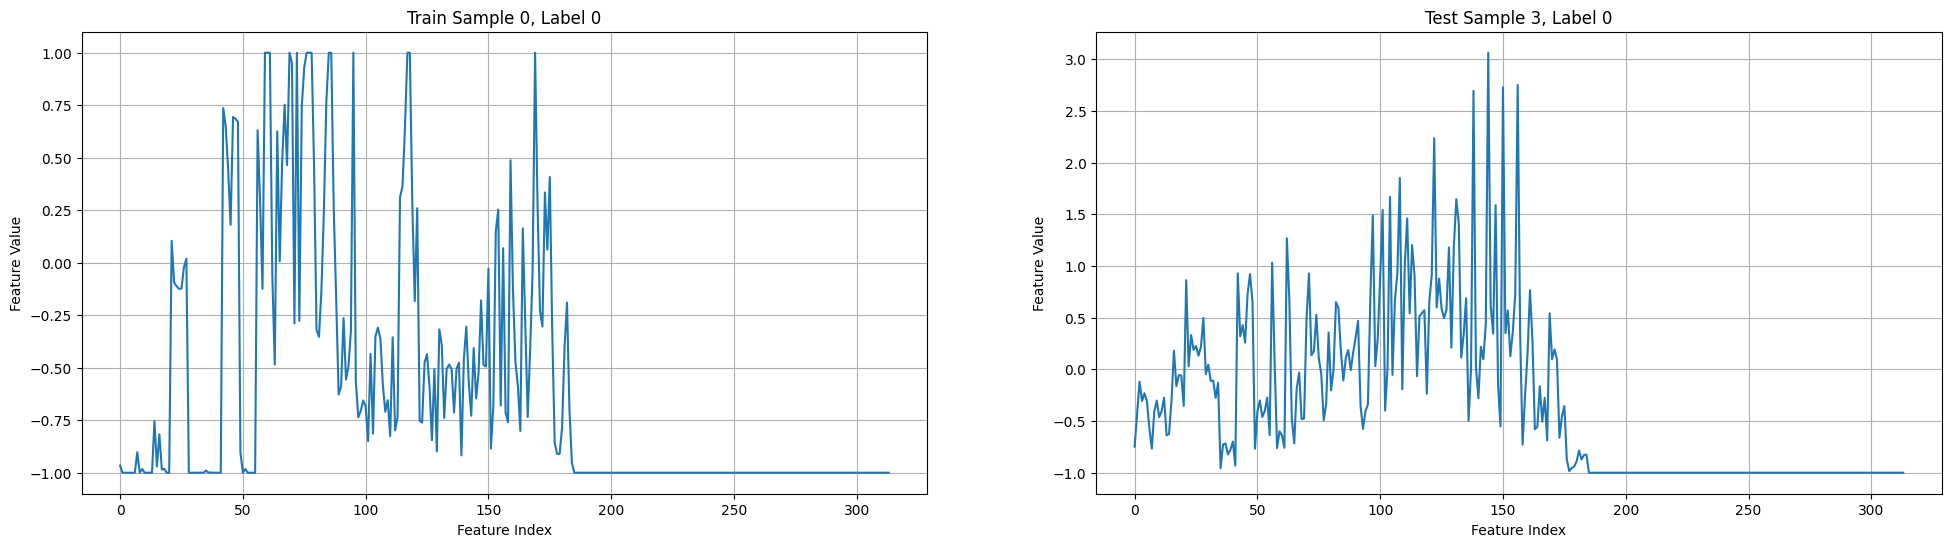

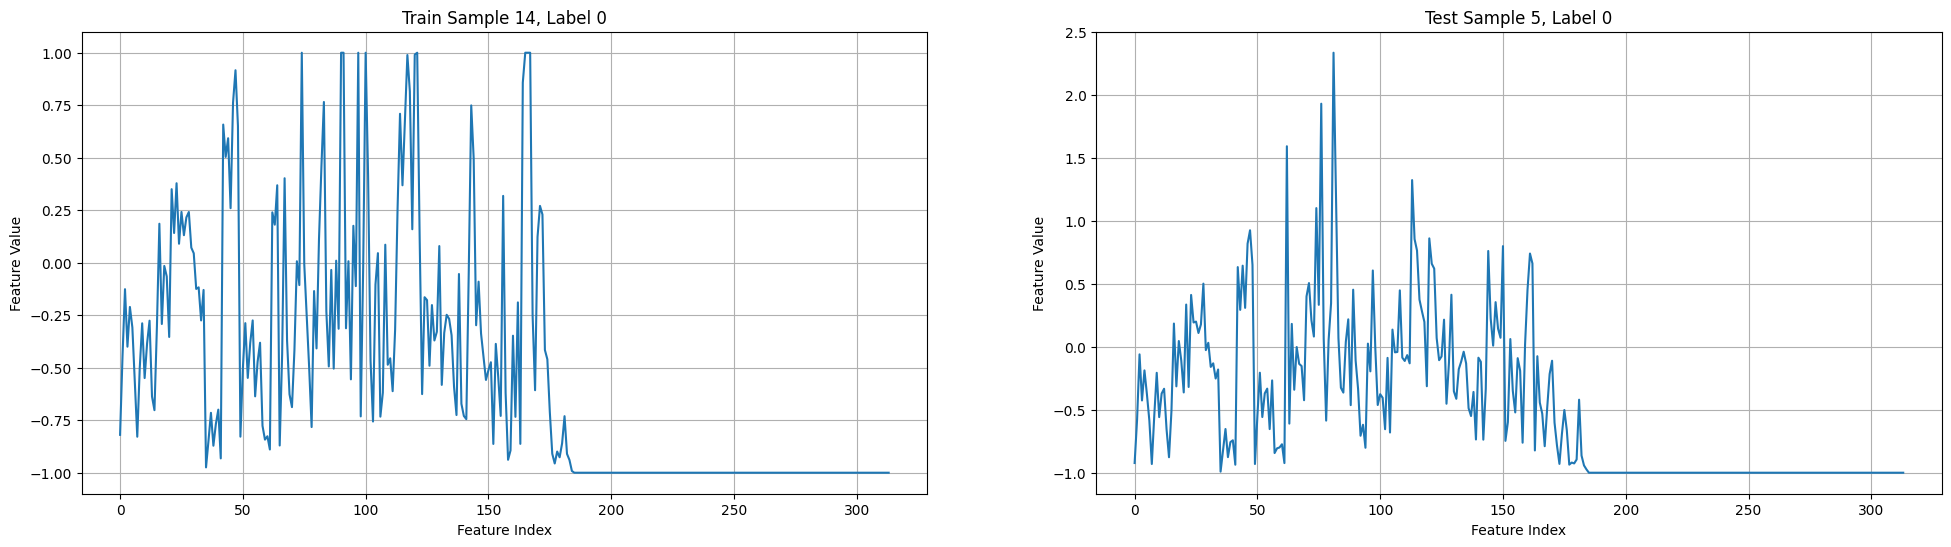

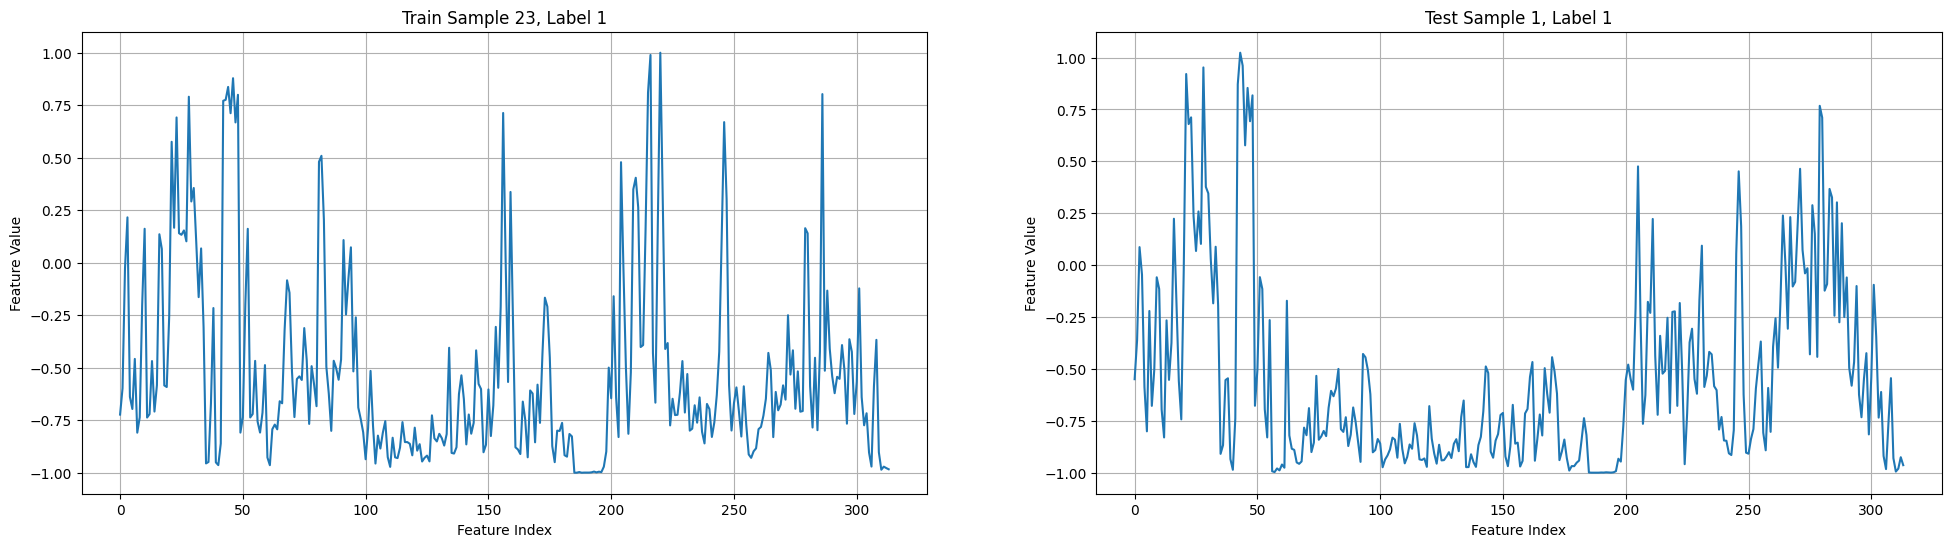

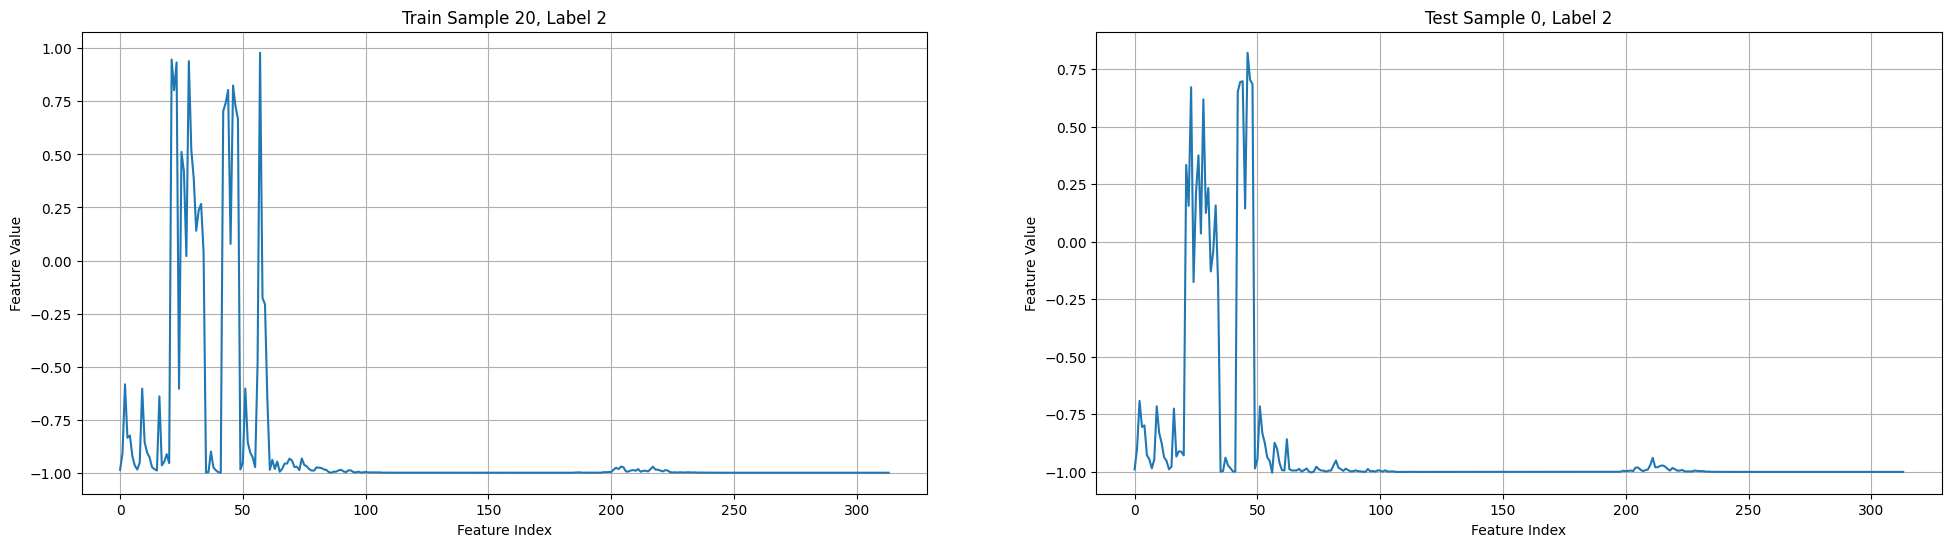

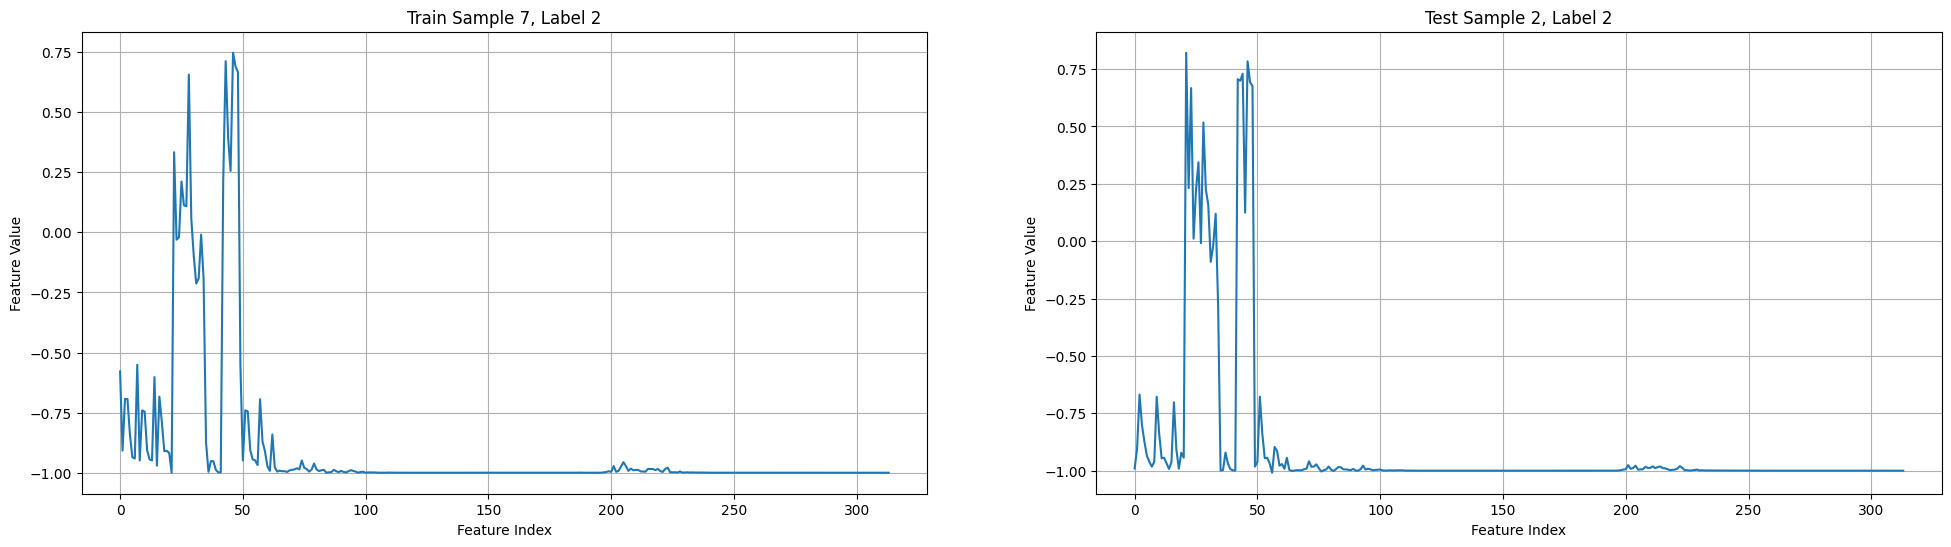

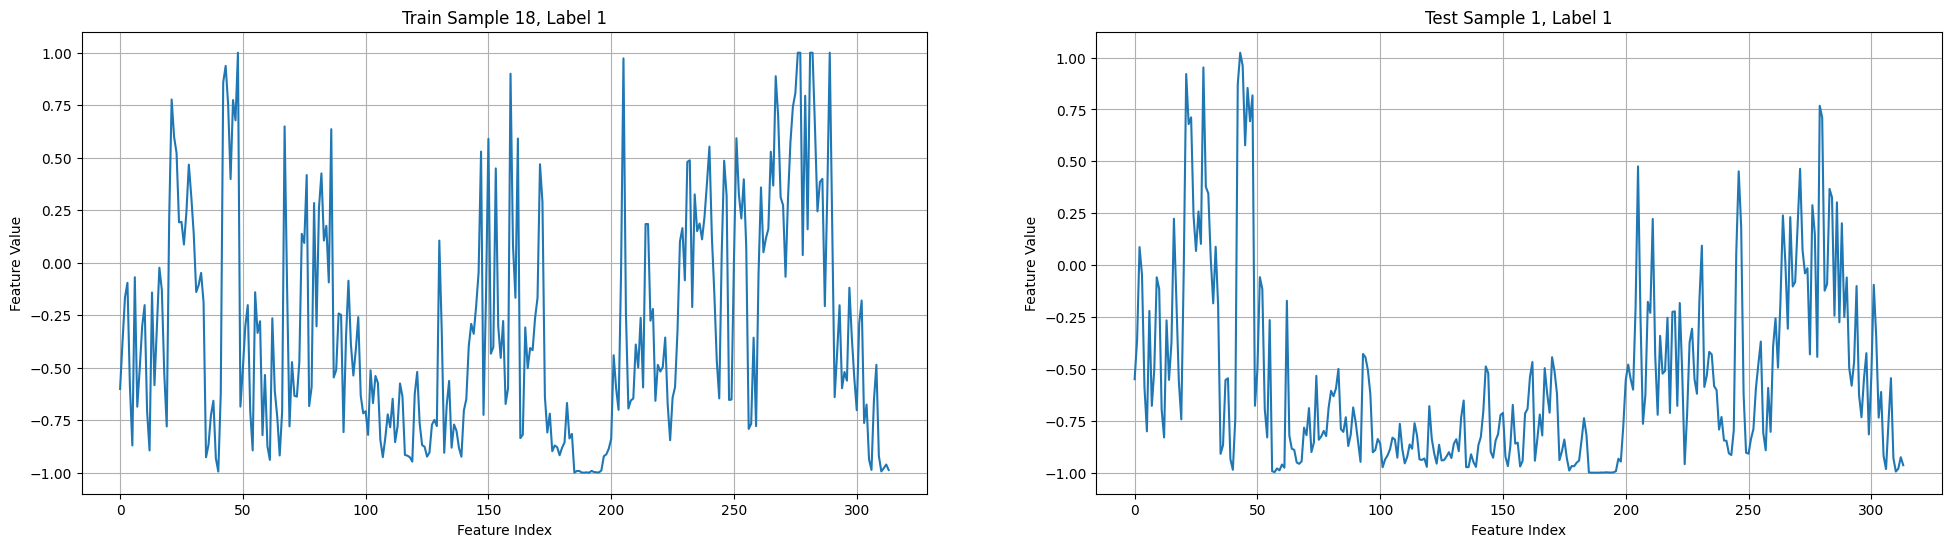

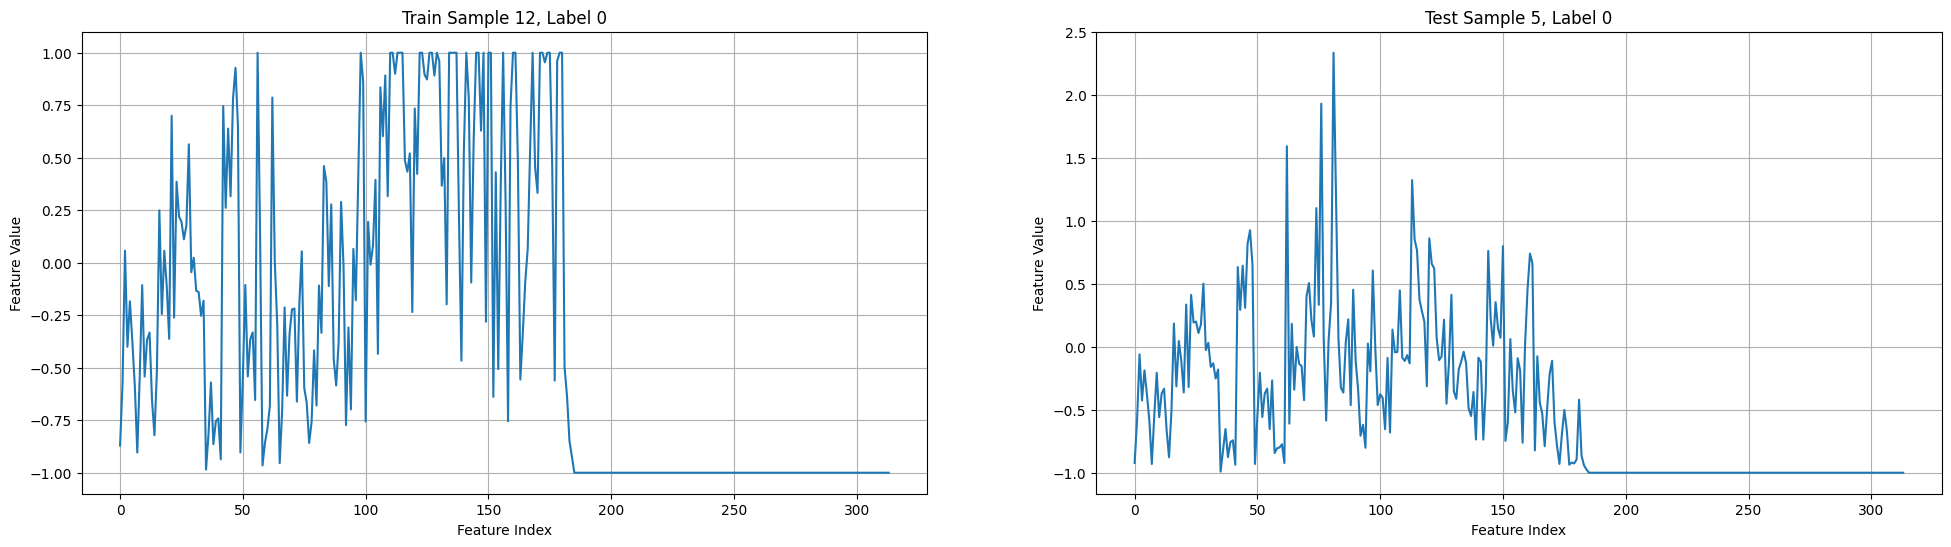

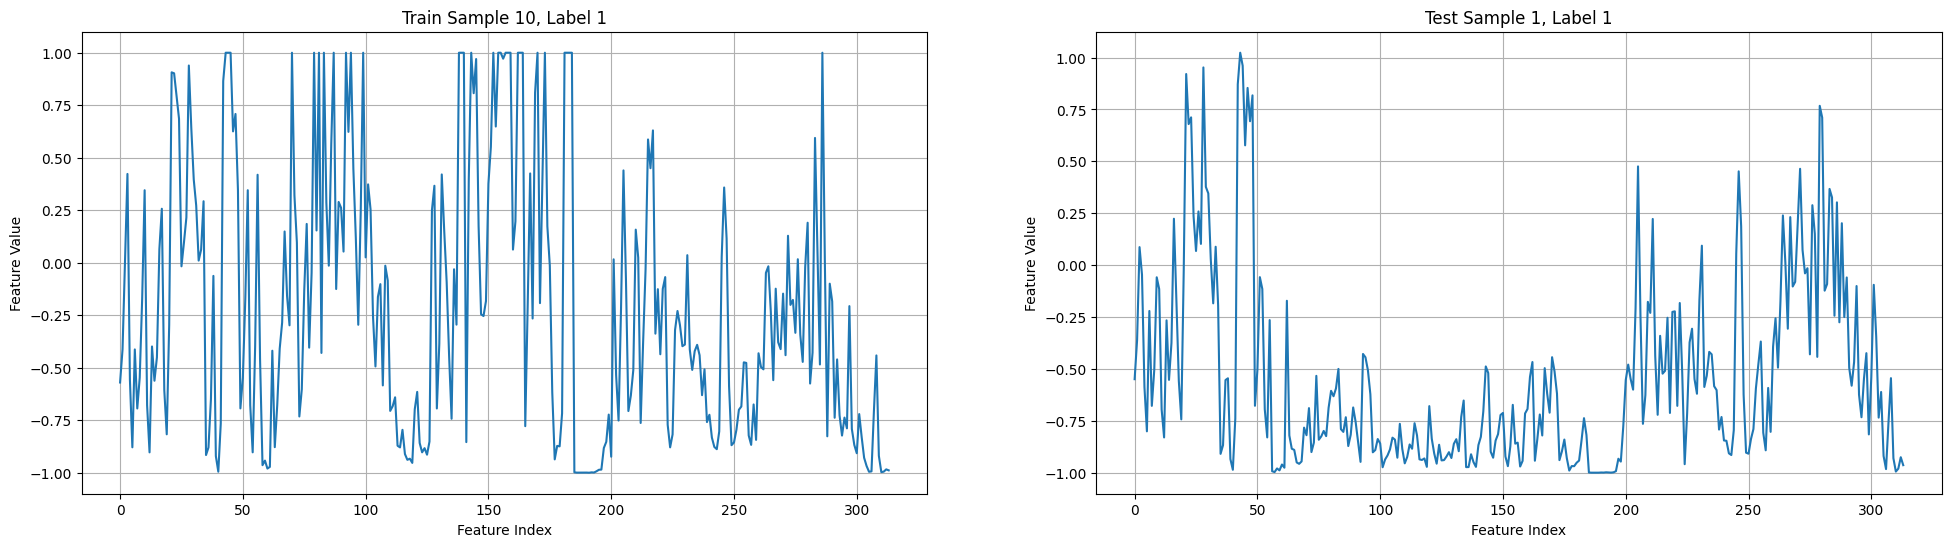

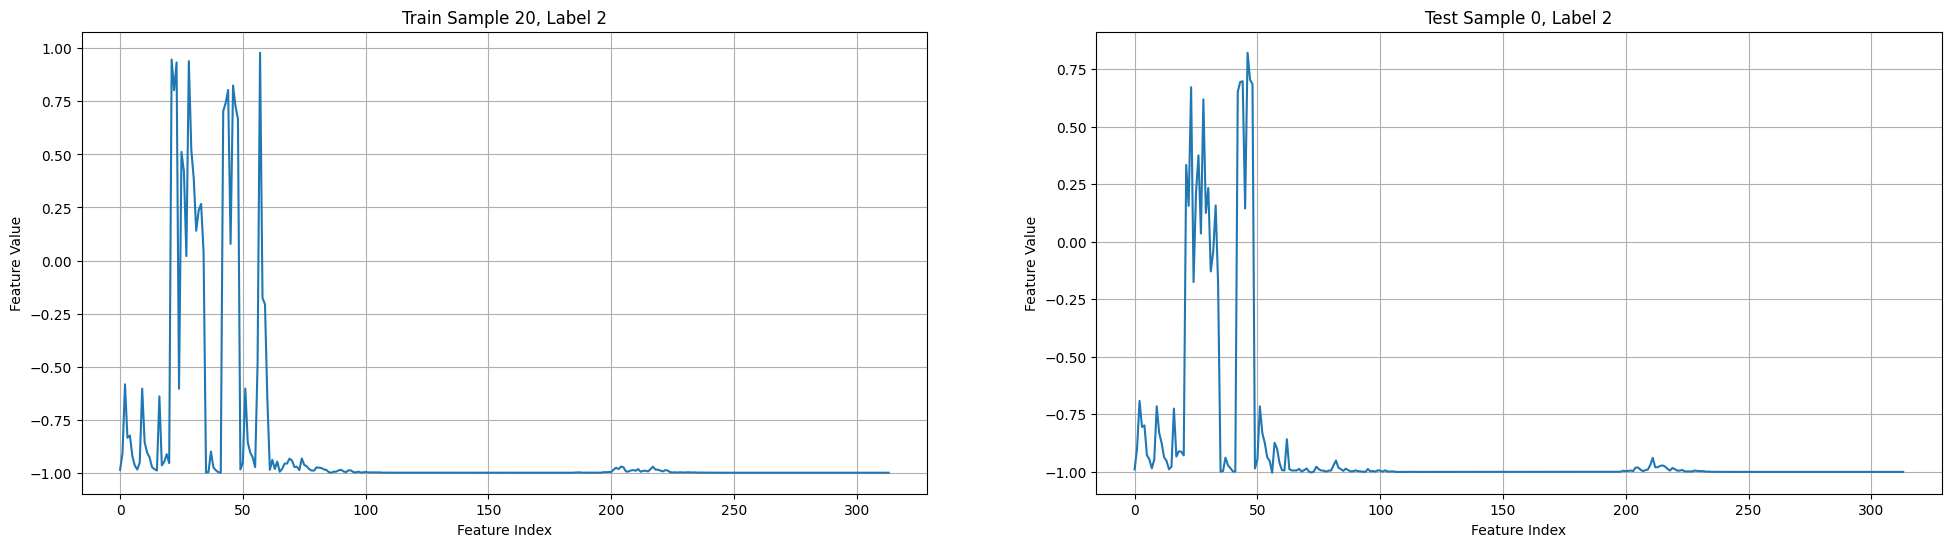

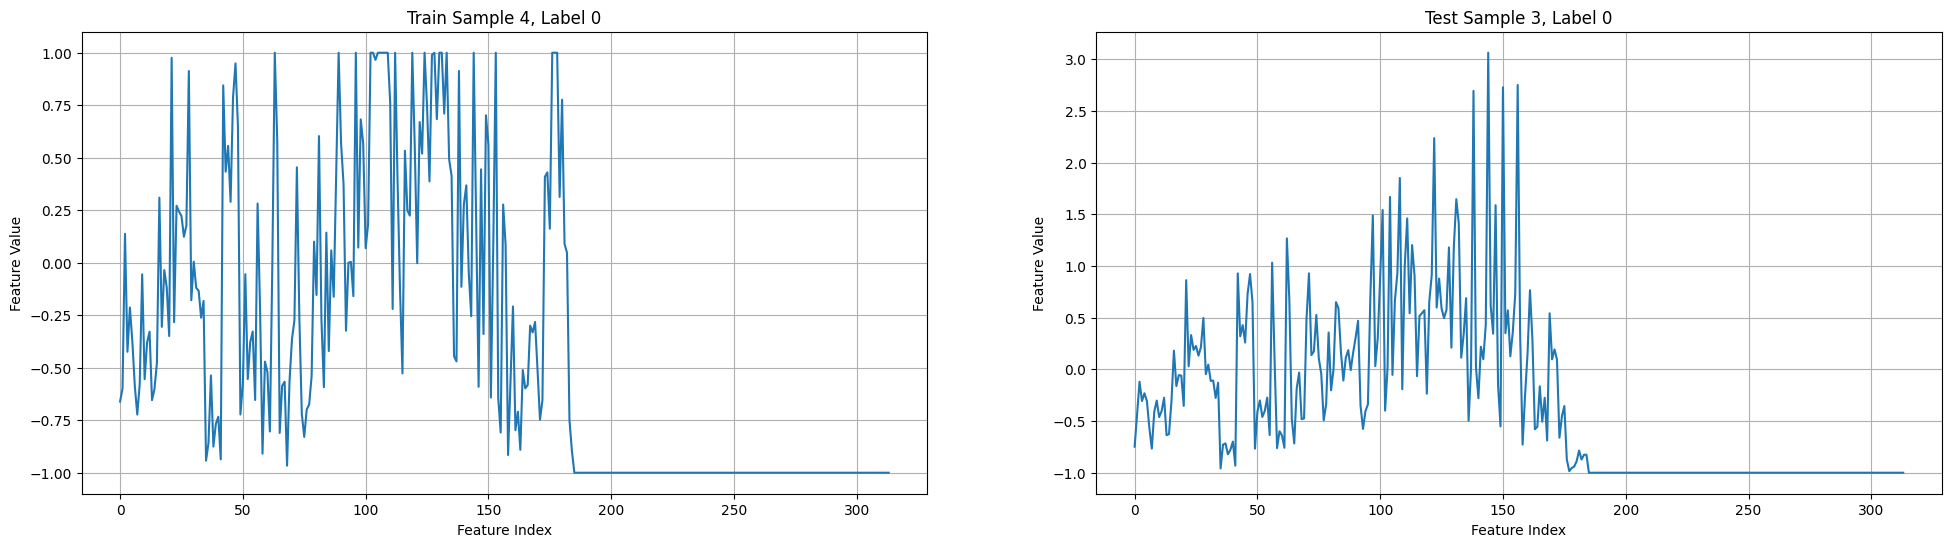

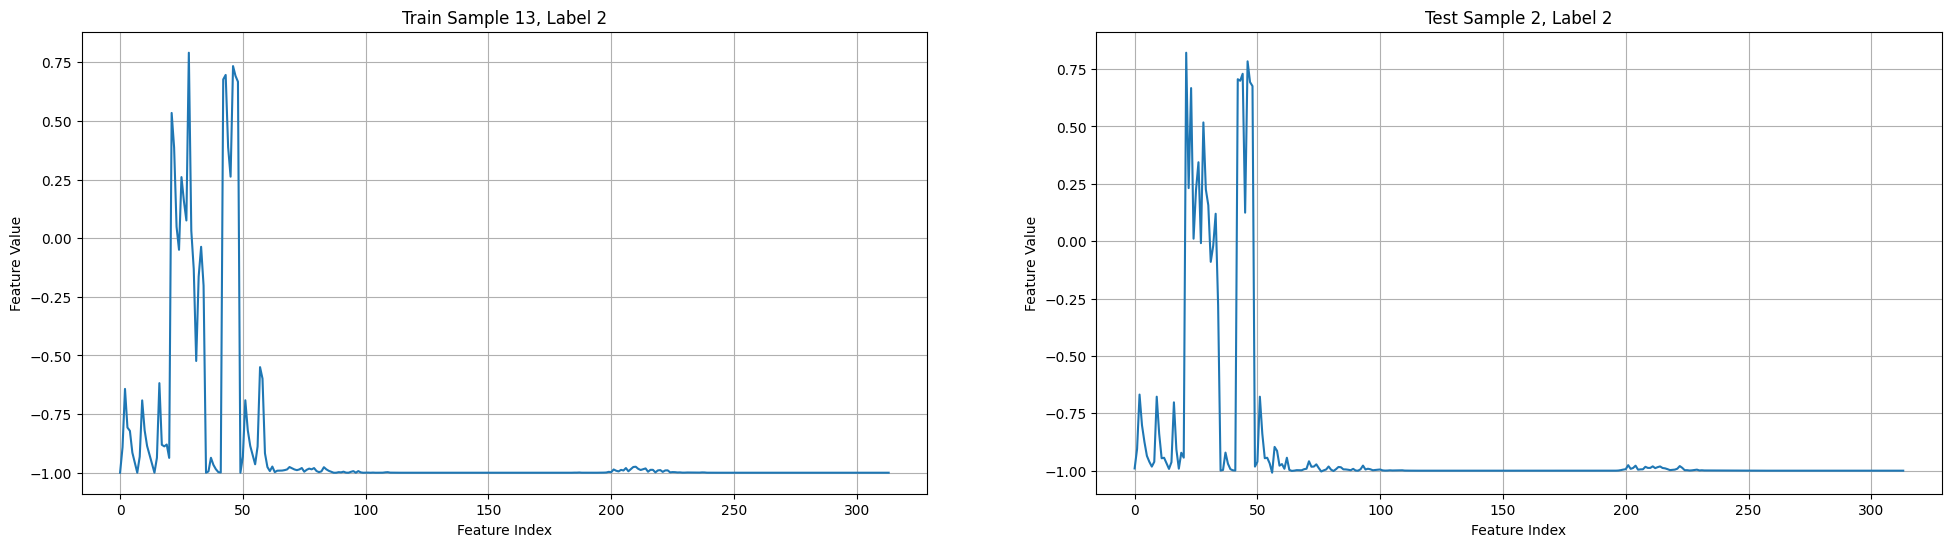

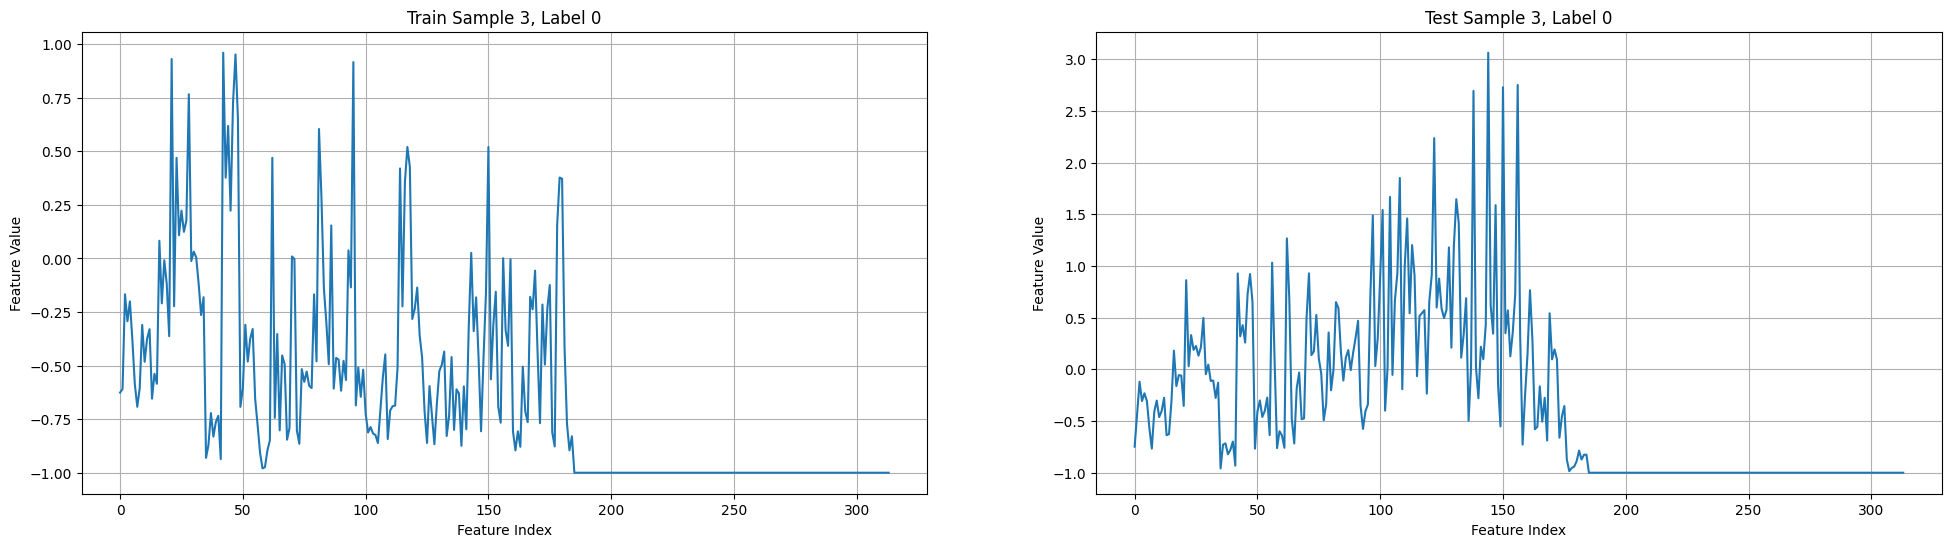

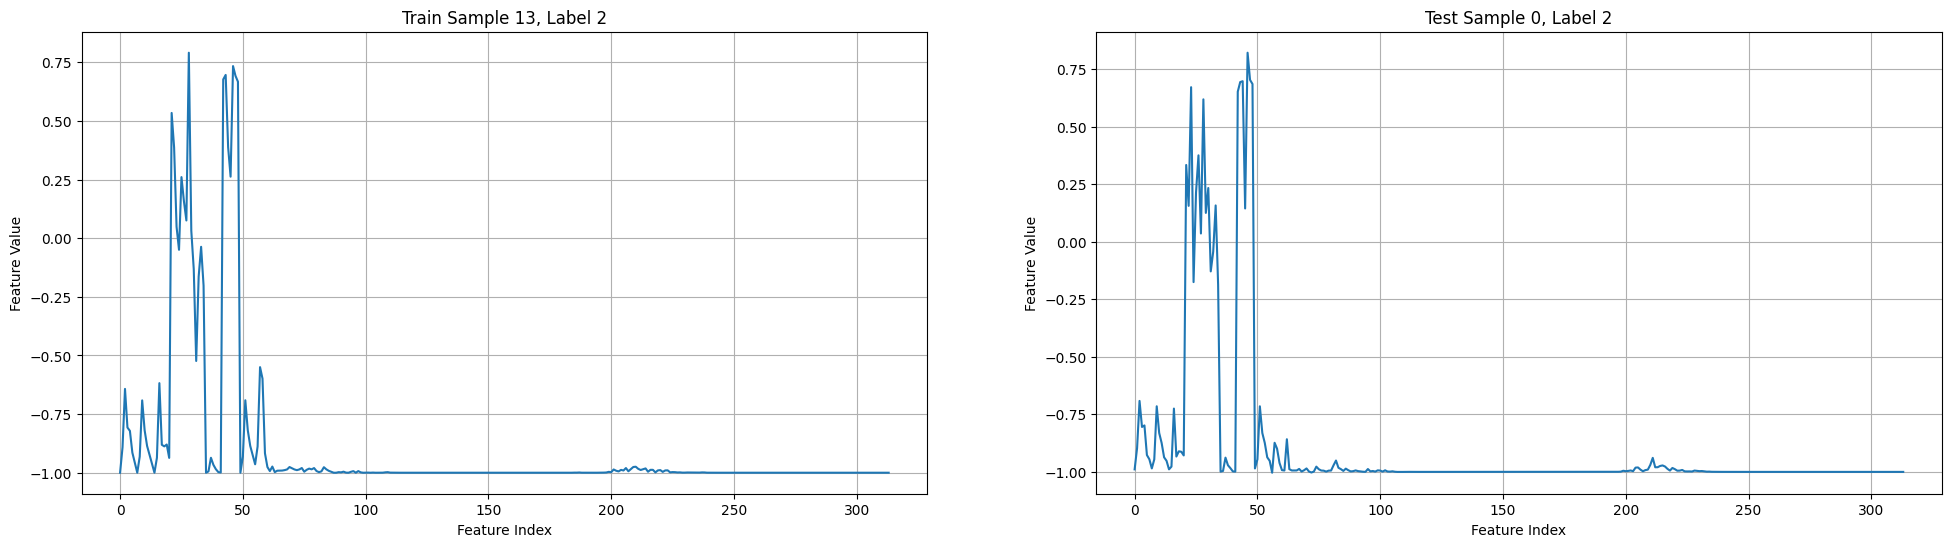

(24, 314)
(6, 314)
(24,)
(6,)
8 8 8 0 314
2 2 2 0 314


In [21]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, LayerNormalization, Reshape
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.backend import clear_session
from matplotlib.ticker import MultipleLocator
# features_array = np.load(file="features_array3.npy")
# GLOBAL_SHAPE_LENGTH = features_array.shape[1]
# scaler = StandardScaler()
# features_array = scaler.fit_transform(features_array)

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, LayerNormalization, Reshape
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.backend import clear_session
from imblearn.over_sampling import SMOTE

up_features_array = np.load(file="up_features_array.npy")
down_features_array = np.load(file="down_features_array.npy")
left_features_array = np.load(file="left_features_array.npy")
# right_features_array = np.load(file="right_features_array.npy")
# # forward_features_array = np.load(file="forward_features_array.npy")
# # backward_features_array = np.load(file="backward_features_array.npy")
# #,left_features_array,right_features_array,forward_features_array,backward_features_array)
features_array = np.concatenate((up_features_array,down_features_array,left_features_array))



print(features_array.shape)
GLOBAL_SHAPE_LENGTH = features_array.shape[1]
print(GLOBAL_SHAPE_LENGTH)

scaler = MinMaxScaler((-1,1))


X_train, X_test, y_train, y_test = train_test_split(features_array, label_array, test_size=.2, random_state=42, shuffle=True, stratify=label_array)
features_array  = scaler.fit_transform(features_array)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lst = y_train.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),lst.count(4),lst.count(5),GLOBAL_SHAPE_LENGTH)

lst = y_test.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),lst.count(4),lst.count(5),GLOBAL_SHAPE_LENGTH)

scaler = MinMaxScaler((-1,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


import numpy as np
import matplotlib.pyplot as plt

for _ in range(25):

  sample_index_train = random.randint(0, len(X_train) - 1)
  train_sample = X_train[sample_index_train]
  train_label = y_train[sample_index_train]

  match_indices = np.where(y_test == train_label)[0]
  sample_index_test = random.choice(match_indices)
  test_sample = X_test[sample_index_test]


  feature_axis = np.arange(len(train_sample))


  plt.figure(figsize=(24, 6))

  # Plot train sample
  plt.subplot(1, 2, 1)
  plt.plot(feature_axis, train_sample)
  plt.title(f"Train Sample {sample_index_train}, Label {y_train[sample_index_train]}")
  plt.xlabel("Feature Index")
  plt.ylabel("Feature Value")
  #plt.ylim((0,1))
  plt.grid(True)

  # Plot test sample
  plt.subplot(1, 2, 2)
  plt.plot(feature_axis, test_sample)
  plt.title(f"Test Sample {sample_index_test}, Label {y_test[sample_index_test]}")
  plt.xlabel("Feature Index")
  plt.ylabel("Feature Value")
  #plt.ylim((0,1))
  plt.grid(True)

  plt.show()


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lst = y_train.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),GLOBAL_SHAPE_LENGTH)
lst = y_test.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),GLOBAL_SHAPE_LENGTH)



In [22]:
class Plasticity(gym.Env):
    def __init__(self, images_per_episode=1, dataset=(X_train, y_train), random=True):
        super().__init__()

        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=-1, high=1,
                                                shape=(GLOBAL_SHAPE_LENGTH,),
                                                dtype=np.float32)
        self.images_per_episode = images_per_episode
        self.step_count = 0

        self.x, self.y = dataset
        self.random = random
        self.dataset_idx = 0

    def step(self, action):

        done = False
        reward = self.calculate_reward(action)

        obs = self._next_obs()

        self.step_count += 1
        if self.step_count >= self.images_per_episode:
            done = True

        return obs, reward, done, {}

    def reset(self):
        self.step_count = 0

        obs = self._next_obs()

        return obs
    
    def calculate_reward(self, action):
      if action == self.expected_action:
          reward = 2
      else:
          reward = -2

      return reward
    
    def _next_obs(self):
        if self.random:
            next_obs_idx = random.randint(0, len(self.x) - 1)
            self.expected_action = int(self.y[next_obs_idx])
            obs = self.x[next_obs_idx]


        else:
            obs = self.x[self.dataset_idx]
            self.expected_action = int(self.y[self.dataset_idx])

            self.dataset_idx += 1
            #print(f"Current dataset index: {self.dataset_idx}")
            if self.dataset_idx >= len(self.x):
                raise StopIteration()

        return obs

In [23]:
env = Plasticity()

In [24]:
env.observation_space.sample()
env.observation_space.sample().shape

(314,)

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.optimizers import Adam
tf.compat.v1.experimental.output_all_intermediates(True)

In [26]:
states = env.observation_space.shape
actions = env.action_space.n
print(states,actions)

(314,) 3


In [27]:
from keras.layers import Conv1D, Dropout, AveragePooling1D, SpatialDropout1D, MaxPooling1D,GlobalMaxPooling1D, BatchNormalization, LSTM, Flatten, Dense, PReLU, Reshape
from keras.models import Sequential
from keras.backend import clear_session
from keras.regularizers import l1_l2

def build_model(states, actions):
    model = Sequential([
        Reshape((GLOBAL_SHAPE_LENGTH,1),input_shape=(1,GLOBAL_SHAPE_LENGTH)),
        BatchNormalization(),

        Conv1D(64, kernel_size=7),
        PReLU(),
        BatchNormalization(),

        MaxPooling1D(pool_size=2),
        SpatialDropout1D(0.1),

        Conv1D(128, kernel_size=5),
        BatchNormalization(),
        PReLU(),
        AveragePooling1D(pool_size=2),
        SpatialDropout1D(0.1),

        LSTM(128, activation='tanh', recurrent_regularizer=l1_l2(l1=0.01, l2=0.01),return_sequences=True),
        BatchNormalization(),
        GlobalMaxPooling1D(),
        BatchNormalization(),
        Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
        BatchNormalization(),
        Dropout(0.1),
        Dense(units=64, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(units=actions, activation='linear')
    ])
    return model


In [28]:
import tensorflow as tf
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from keras import __version__
model = build_model(states, actions)
model.summary()


Instructions for updating:
Colocations handled automatically by placer.


2024-03-27 16:57:15.653638: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 16:57:15.666967: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 314, 1)            0         
                                                                 
 batch_normalization (Batch  (None, 314, 1)            4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 308, 64)           512       
                                                                 
 p_re_lu (PReLU)             (None, 308, 64)           19712     
                                                                 
 batch_normalization_1 (Bat  (None, 308, 64)           256       
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 154, 64)           0

In [29]:
def build_agent(model, actions):
    policy = EpsGreedyQPolicy(eps=0.1)
    memory = SequentialMemory(limit=30000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=100, target_model_update=1e-4)
    return dqn, policy

In [30]:
dqn, policy = build_agent(model, actions)
dqn.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0055,decay=1e-4), metrics=['mse'])

2024-03-27 16:57:16.512530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-03-27 16:57:16.605994: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_5_1/moving_variance/Assign' id:1567 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_5_1/moving_variance/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_5_1/moving_variance, batch_normalization_5_1/moving_variance/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [31]:
from rl.callbacks import Callback

class LossHistory(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][0])

class LossHistory2(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][1])

class RewardHistory(Callback):
    def on_train_begin(self, logs={}):
        self.rewards = []

    def on_episode_end(self, episode, logs={}):
        self.rewards.append(logs['episode_reward'])

class ExponentialDecayEpsilonCallback(Callback):
    def __init__(self, initial_epsilon, min_epsilon, decay_rate, decay_steps):
        self.epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps
        self.step_count = 0

    def on_step_end(self, step, logs={}):
        self.step_count += 1
        self.epsilon = self.min_epsilon + (self.epsilon - self.min_epsilon) * np.exp(-self.step_count / self.decay_steps)
        self.model.policy.eps = max(self.epsilon, self.min_epsilon)
        


initial_epsilon = 1.0  
min_epsilon = 0.0 
decay_rate = 0.0001     
decay_steps = 100000    

epsilon_decay_cb = ExponentialDecayEpsilonCallback(initial_epsilon, min_epsilon, decay_rate, decay_steps)


loss_history = LossHistory()
loss_history2 = LossHistory2()
reward_history = RewardHistory()


dqn.fit(env, nb_steps=3000, callbacks=[loss_history,loss_history2,reward_history,epsilon_decay_cb], verbose=1)
dqn.policy.eps = 0
dqn.fit(env, nb_steps=400, callbacks=[loss_history,loss_history2,reward_history], verbose=1)
dqn.fit(env, nb_steps=400, callbacks=[loss_history,loss_history2,reward_history], verbose=1)

Training for 3000 steps ...
Interval 1 (0 steps performed)


/home/eeshan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-03-27 16:57:17.192676: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2/BiasAdd' id:862 op device:{requested: '', assigned: ''} def:{{{node dense_2/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_2/MatMul, dense_2/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-03-27 16:57:17.263636: W tensorflow/c/c_api.cc:304] Operation '{name:'count_1/Assign' id:2417 op device:{requested: '', assigned: ''} def:{{{node count_1/Assign}} = AssignVariableOp[_has_manual_control_de

   94/10000 [..............................] - ETA: 56s - reward: -0.5106

2024-03-27 16:57:17.999627: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2_1/BiasAdd' id:1721 op device:{requested: '', assigned: ''} def:{{{node dense_2_1/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense_2_1/MatMul, dense_2_1/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-03-27 16:57:18.641891: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_6/cond_3/Identity' id:816 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_6/cond_3/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](batch_normalization_6/cond_3)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after 

  175/10000 [..............................] - ETA: 9:34 - reward: -0.5143done, took 10.524 seconds
Training for 400 steps ...
Interval 1 (0 steps performed)
  210/10000 [..............................] - ETA: 9:56 - reward: 0.0000e+00

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold



def dqn_eval(dqn_agent,d):
    attempts, correct = 0, 0
    labels = d[1]
    eenv = Plasticity(dataset=d, random=False)
    thing = 1
    y_predFull = []
    y_trueest = []
    total_reward = 0



    try:

        while True:

            if thing == 1:
                obs = eenv.reset()
                thing = 0
            done = False
            while not done:

                obs_reshaped = np.reshape(obs, (1,) + obs.shape)

                q_values = dqn_agent.compute_q_values(obs_reshaped)
                #print(q_values)

                action = np.argmax(q_values)

                #print('action: ', action, " - ", labels[attempts])
                y_predFull.append(action)
                y_trueest.append(labels[attempts])

                obs, rew, done, _ = eenv.step(action)
                if(rew == 2):
                    print(f"Correct Action: {action}, Reward Gained: {rew}")
                total_reward += rew
                if done:
                    attempts += 1

    except StopIteration:
        print()
        print('Validation done...','total reward=',total_reward)

        y_predFull = np.array(y_predFull)
        y_trueest = np.array(y_trueest)

        cm = confusion_matrix(y_trueest, y_predFull)
        print(y_predFull)
        print(y_trueest)

        print("Confusion Matrix:\n", cm)

        report = classification_report(y_trueest, y_predFull,digits=4)
        print("Classification Report:\n", report)

        report = classification_report(y_trueest, y_predFull,output_dict=True)

        correct = sum(y_predFull == y_trueest)
        attempts = len(y_trueest)
        accuracy = (float(correct) / attempts)
        print('Validation done...')
        print('Accuracy: {:.2f}%'.format(accuracy*100))

        F1 = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']

        print("F1 Score: {:.2f}%".format(F1*100))
        print("Precision: {:.2f}%".format(precision*100))
        print("Recall: {:.2f}%".format(recall*100))

    y_predFull = []
    y_trueest = []
    return accuracy, F1, precision, recall

dqn_eval(dqn,d=(X_train,y_train))
print('***************************************************************************************')
dqn_eval(dqn,d=(X_test,y_test))
print('***************************************************************************************')

def dqn_eval2(d,split=5):
     
    n_splits = split
    mean_rewards_per_fold = []
    acc_per_fold = []
    f1_mean, p_mean, r_mean = [], [], []
    # Loop over each fold
    
    skf = StratifiedKFold(n_splits=n_splits)
    train, test = d
    for train_index, test_index in skf.split(train,test):
        xtr, xte = train[train_index],train[test_index]
        ytr, yte = test[train_index], test[test_index]

        test_env = Plasticity(dataset = (xte, yte),random=True)
        
        scores = dqn.test(test_env, nb_episodes=10, visualize=False, verbose=1)
        acc, f1, p, r = dqn_eval(dqn,d=(xte, yte))
        
        mean_reward = np.mean(scores.history['episode_reward'])
        mean_rewards_per_fold.append(mean_reward)
        acc_per_fold.append(acc)
        f1_mean.append(f1)
        r_mean.append(r)
        p_mean.append(p)
   
    overall_mean_reward = np.mean(mean_rewards_per_fold)

    #print(acc_per_fold)
    
    f1_avg, p_avg, r_avg = np.mean(f1_mean), np.mean(p_mean), np.mean(r_mean)
    #print(mean_rewards_per_fold)
    print(f"Overall Mean Reward across all folds: {overall_mean_reward * 100} %")
    acc_avg = np.mean(acc_per_fold)
    print(f"Overall Mean Accuracy across all folds: {acc_avg * 100} %")
    #print(f1_mean)
    print(f"Overall Mean F1 across all folds: {f1_avg * 100} %")
    #print(p_mean)
    print(f"Overall Mean Precision across all folds: {p_avg * 100} %")
    #print(r_mean)
    print(f"Overall Mean Recall across all folds: {r_avg * 100} %")
#dqn_eval2(d=(X_train,y_train))

dqn_eval2(d=(features_array,label_array))
dqn_eval(dqn,d=(features_array,label_array))

Correct Action: 0, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 2, Reward Gained: 2

Validation done... total reward= 44
[0 2 0 0 0 1 1 2 0 2 1 0 0 2 0 1 2 1 1 1 2 2 2]
[0 2 0 0 0 1 1 2 0 2 1 0 0 2 0 1 2 1 1 1 2 2 2]
Confusion Matrix:
 [[8 0 0]
 [0 7 0]
 [0 0 8]]
Classification Report:
     

Episode 7: reward: 2.000, steps: 1
Episode 8: reward: 2.000, steps: 1
Episode 9: reward: 2.000, steps: 1
Episode 10: reward: 2.000, steps: 1
Correct Action: 0, Reward Gained: 2
Correct Action: 0, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 1, Reward Gained: 2

Validation done... total reward= 8
[0 0 1 1 2]
[0 0 1 1 2]
Confusion Matrix:
 [[2 0 0]
 [0 2 0]
 [0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     1.0000    1.0000    1.0000         2
           2     1.0000    1.0000    1.0000         1

    accuracy                         1.0000         5
   macro avg     1.0000    1.0000    1.0000         5
weighted avg     1.0000    1.0000    1.0000         5

Validation done...
Accuracy: 100.00%
F1 Score: 100.00%
Precision: 100.00%
Recall: 100.00%
Testing for 10 episodes ...
Episode 1: reward: 2.000, steps: 1
Episode 2: reward: 2.000, steps: 1
Episode 3: rewa

(1.0, 1.0, 1.0, 1.0)

In [ ]:

dqn_eval(dqn,d=(X_test,y_test))

Correct Action: 2, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 0, Reward Gained: 2

Validation done... total reward= 8
[2 1 2 0 1]
[2 1 2 0 1]
Confusion Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         1
           1     1.0000    1.0000    1.0000         2
           2     1.0000    1.0000    1.0000         2

    accuracy                         1.0000         5
   macro avg     1.0000    1.0000    1.0000         5
weighted avg     1.0000    1.0000    1.0000         5

Validation done...
Accuracy: 100.00%
F1 Score: 100.00%
Precision: 100.00%
Recall: 100.00%


(1.0, 1.0, 1.0, 1.0)

In [ ]:
class TestPhaseLogger(Callback):
    def __init__(self, env):
        
        self.env = env

    def on_action_end(self, action, logs={}):
       
        if not self.model.training and self.env.calculate_reward(action) > 0:
            print(f"Correct Action: {action}, Reward Gained")
test_logger = TestPhaseLogger(env)

Testing for 10 episodes ...
Episode 1: reward: 2.000, steps: 1
Correct Action: 0, Reward Gained
Episode 2: reward: 2.000, steps: 1
Episode 3: reward: 2.000, steps: 1
Episode 4: reward: 2.000, steps: 1
Episode 5: reward: 2.000, steps: 1
Episode 6: reward: 2.000, steps: 1
Episode 7: reward: 2.000, steps: 1
Correct Action: 2, Reward Gained
Episode 8: reward: 2.000, steps: 1
Episode 9: reward: 2.000, steps: 1
Correct Action: 2, Reward Gained
Episode 10: reward: 2.000, steps: 1
200.0 %


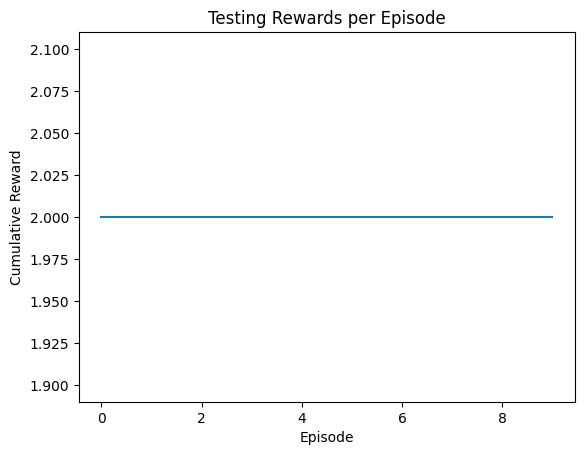

Testing for 10 episodes ...
Episode 1: reward: 2.000, steps: 1
Episode 2: reward: 2.000, steps: 1
Episode 3: reward: 2.000, steps: 1
Episode 4: reward: 2.000, steps: 1
Episode 5: reward: 2.000, steps: 1
Episode 6: reward: 2.000, steps: 1
Episode 7: reward: 2.000, steps: 1
Correct Action: 1, Reward Gained
Episode 8: reward: 2.000, steps: 1
Episode 9: reward: 2.000, steps: 1
Episode 10: reward: 2.000, steps: 1
200.0 %


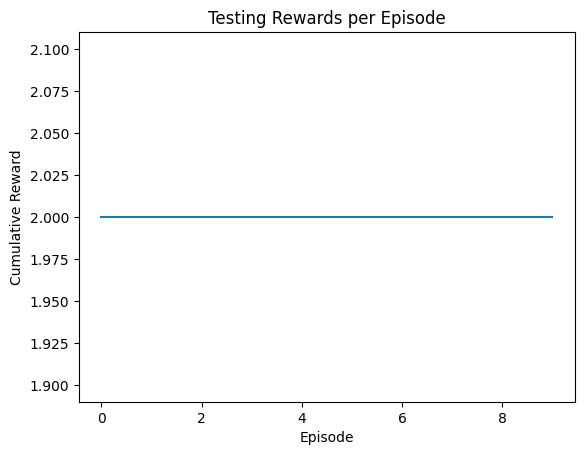

200.0 %
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2] (30,)
Correct Action: 2, Reward Gained: 2
Correct Action: 1, Reward Gained: 2
Correct Action: 2, Reward Gained: 2
Correct Action: 0, Reward Gained: 2

Validation done... total reward= 8
[2 1 2 0 1]
[2 1 2 0 1]
Confusion Matrix:
 [[1 0 0]
 [0 2 0]
 [0 0 2]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         1
           1     1.0000    1.0000    1.0000         2
           2     1.0000    1.0000    1.0000         2

    accuracy                         1.0000         5
   macro avg     1.0000    1.0000    1.0000         5
weighted avg     1.0000    1.0000    1.0000         5

Validation done...
Accuracy: 100.00%
F1 Score: 100.00%
Precision: 100.00%
Recall: 100.00%
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

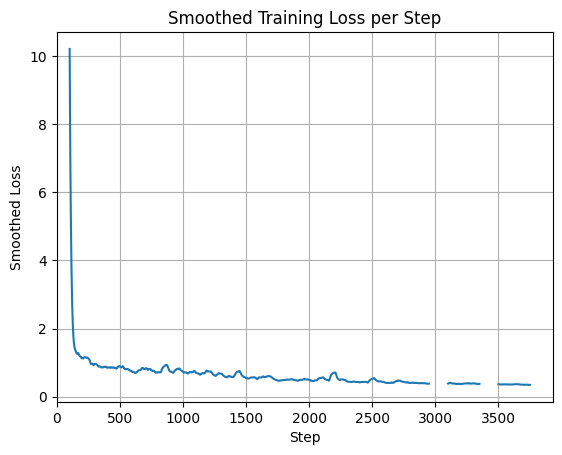

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2.831566, 2.82799, 2.8134785, 2.8002794, 2.7867737, 2.7858586, 2.7697818, 2.7450283, 2.725251, 2.7114244, 2.694302, 2.6808605, 2.6755383, 2.6715193, 2.661401, 2.6475432, 2.6370506, 2.6271908, 2.6193178, 2.6112583, 2.6033113, 2.6036687, 2.606145, 2.6053307, 2.6046777, 2.5972872, 2.5969667, 2.5981612, 2.590058, 2.5888433, 2.5891595, 2.5816934, 2.5795784, 2.5755267, 2.5754082, 2.5745304, 2.5699046, 2.569074, 2.5710006, 2.572743, 2.5766063, 2.5809946, 2.5823114, 2.5856147, 2.583407, 2.585891, 

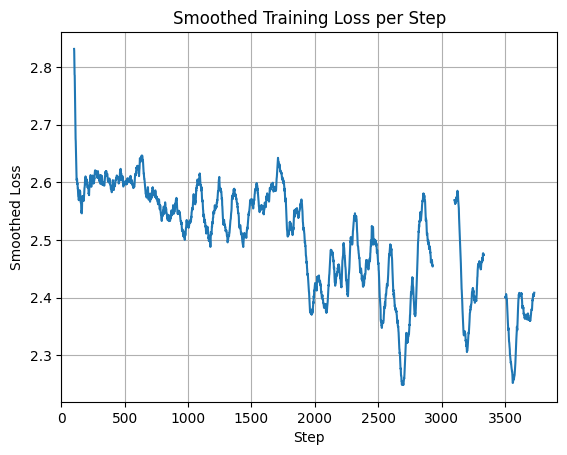

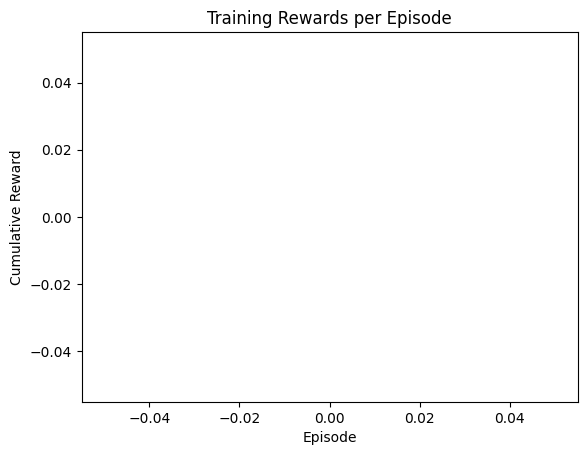

___________________________________________________________________________________________________________________________


In [ ]:
scores = dqn.test(env=Plasticity(dataset=(X_test,y_test),random=True), nb_episodes=10, visualize=False, callbacks=[reward_history,test_logger],verbose=1)
print(np.mean(scores.history['episode_reward'])*100,'%')
plt.plot(scores.history['episode_reward'])
plt.title('Testing Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

scores = dqn.test(env=Plasticity(dataset=(features_array,label_array),random=True), nb_episodes=10, visualize=False, callbacks=[reward_history,test_logger],verbose=1)
print(np.mean(scores.history['episode_reward'])*100,'%')
plt.plot(scores.history['episode_reward'])
plt.title('Testing Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()


print(np.mean(scores.history['episode_reward'])*100,'%')
print(label_array,label_array.shape)

dqn_eval(dqn,d=(X_test,y_test))
def moving_average(data, window_size):
    return [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]
losses = loss_history.losses
losses2 = loss_history2.losses
smoothed_losses = moving_average(losses, window_size=50)
print(smoothed_losses)
plt.plot(smoothed_losses)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

smoothed_losses2 = moving_average(losses2, window_size=70)
print(smoothed_losses2)
plt.plot(smoothed_losses2)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

plt.plot(moving_average(reward_history.rewards, window_size=70))
plt.title('Training Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

print("___________________________________________________________________________________________________________________________")




